In [1]:
require(tidyverse)
require(party)
require(mgcv)
require(lattice)
require(languageR)
require(itsadug)
require(repr)

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.1     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: 'strucchange'


The following object is masked from 'package:stringr':

    boundary


Loading required package: mgcv

Loading required package: nlme


Attaching pac

## Naming data

## CLP data

In [2]:
clp = read_csv("../data/CLP_sense_indices_2char.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Word_Trad = col_character(),
  Word_Sim = col_character(),
  C1 = col_character(),
  C2 = col_character()
)

See spec(...) for full column specifications.



In [3]:
dim(clp)

[1] 3712   63

In [4]:
names(clp)

[1] "Word_Trad"           "Word_Sim"            "Ntrials"            
 [4] "Acc"                 "RT"                  "RT-SE"              
 [7] "RT-SD"               "zRT"                 "Stroke-1"           
[10] "Stroke-2"            "C&B-Subtitle-raw-C1" "C&B-Subtitle-raw-C2"
[13] "C&B-Subtitle-CD-C1"  "C&B-Subtitle-CD-C2"  "SS&M-C1"            
[16] "SS&M-C2"             "Da-Modern-C1"        "Da-Modern-C2"       
[19] "Google-freq-C1"      "Google-freq-C2"      "C&B-Subtitle-raw-W" 
[22] "C&B-Subtitle-CD-W"   "SS&M-W"              "Da-News-W"          
[25] "Da-Fiction-W"        "Google-freq-W"       "ST-C1"              
[28] "ST-C2"               "C1"                  "C2"                 
[31] "n_sense_W"           "log_n_sense_W"       "n_tagged_W"         
[34] "sfreq_sum_W"         "sfreq_max_W"         "sfreq_std_W"        
[37] "sfreq_ent_W"         "sfreq_ent_norm_W"    "vol_raw_W"          
[40] "vol_cen_W"           "vol_cennorm_W"       "n_sense_C1"         
[43] "log_n_sense_C1"      "n_tagged_C1"         "sfreq_sum_C1"       
[46] "sfreq_max_C1"        "sfreq_std_C1"        "sfreq_ent_C1"       
[49] "sfreq_ent_norm_C1"   "vol_raw_C1"          "vol_cen_C1"         
[52] "vol_cennorm_C1"      "n_sense_C2"          "log_n_sense_C2"     
[55] "n_tagged_C2"         "sfreq_sum_C2"        "sfreq_max_C2"       
[58] "sfreq_std_C2"        "sfreq_ent_C2"        "sfreq_ent_norm_C2"  
[61] "vol_raw_C2"          "vol_cen_C2"          "vol_cennorm_C2"

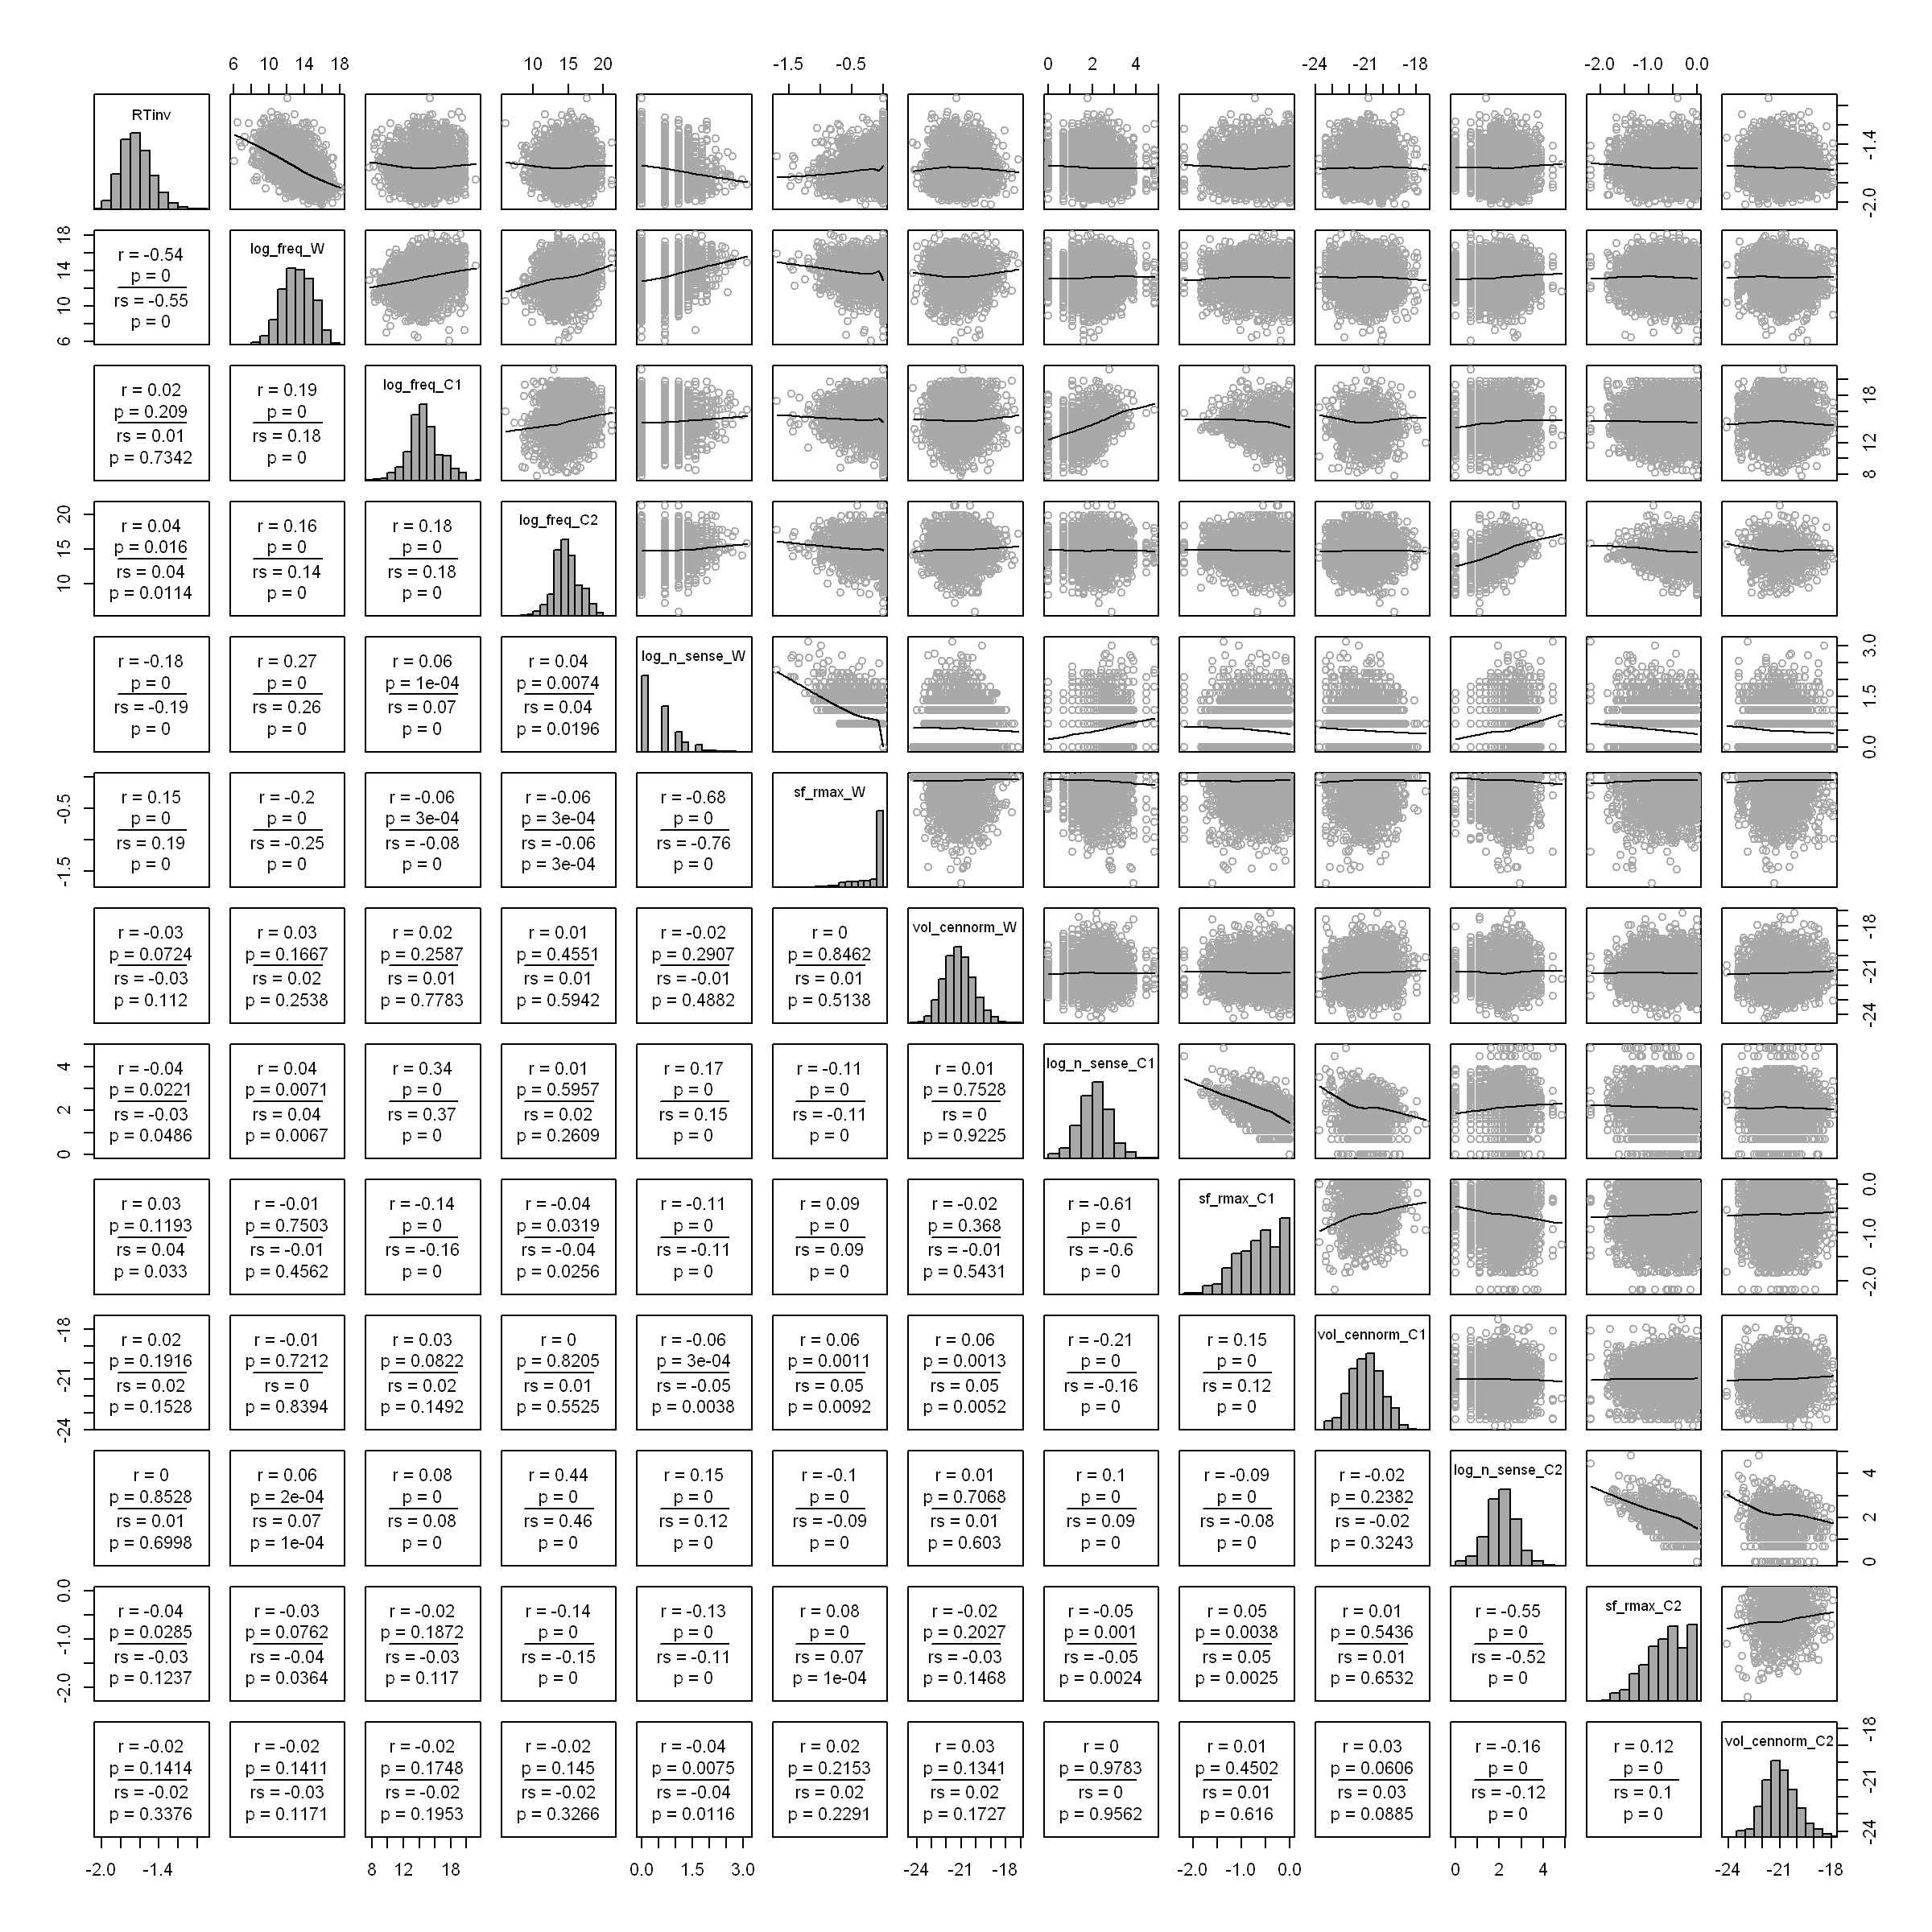

In [29]:
clp$log_freq_W = log(clp$`SS&M-W`)
clp$log_freq_C1 = log(clp$`SS&M-C1`)
clp$log_freq_C2 = log(clp$`SS&M-C2`)
clp$RTinv = -1000/clp$RT
clp$sf_rmax_W = log((clp$sfreq_max_W+1) / (clp$sfreq_sum_W+1))
clp$sf_rmax_C1 = log((clp$sfreq_max_C1+1) / (clp$sfreq_sum_C1+1))
clp$sf_rmax_C2 = log((clp$sfreq_max_C2+1) / (clp$sfreq_sum_C2+1))
clp_variables = c("RTinv", "log_freq_W", "log_freq_C1", "log_freq_C2",
                       "log_n_sense_W", "sf_rmax_W", "vol_cennorm_W",
                       "log_n_sense_C1", "sf_rmax_C1", "vol_cennorm_C1",
                       "log_n_sense_C2", "sf_rmax_C2", "vol_cennorm_C2")
options(repr.plot.width=12, repr.plot.height=12)

pairscor.fnc(clp[,c(clp_variables)])

## Variable importance

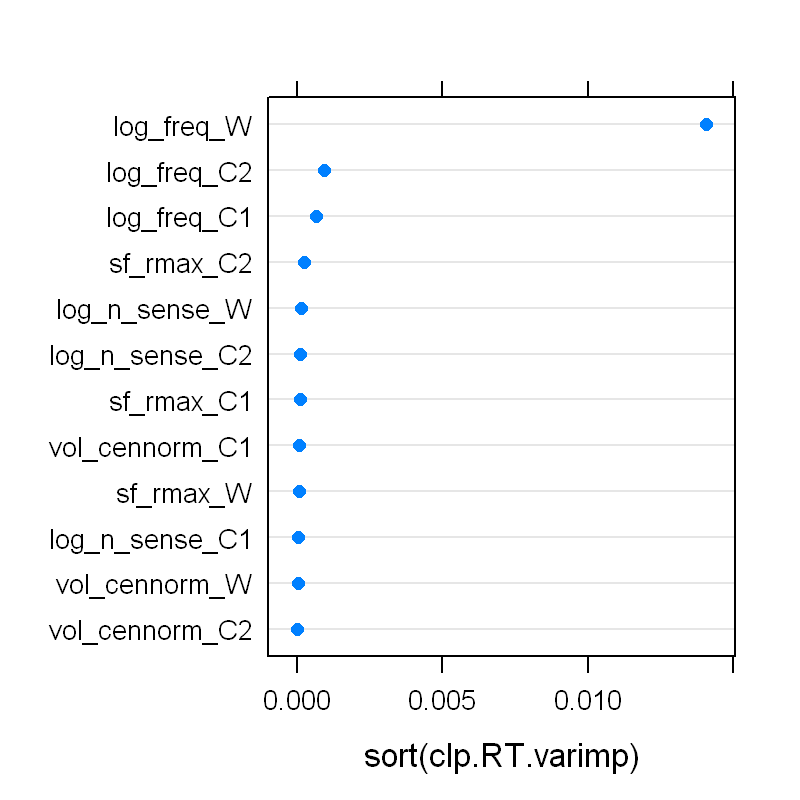

In [31]:
clp.RT.cf <- cforest(RTinv ~ ., data=clp[,clp_variables])
clp.RT.varimp = varimp(clp.RT.cf)
options(repr.plot.width=4, repr.plot.height=4)
dotplot(sort(clp.RT.varimp), main=list(cex=2))

In [33]:
clp_variables.ex.freq = clp_variables[-c(2:4)]
clp_variables.ex.freq

[1] "RTinv"          "log_n_sense_W"  "sf_rmax_W"      "vol_cennorm_W" 
 [5] "log_n_sense_C1" "sf_rmax_C1"     "vol_cennorm_C1" "log_n_sense_C2"
 [9] "sf_rmax_C2"     "vol_cennorm_C2"

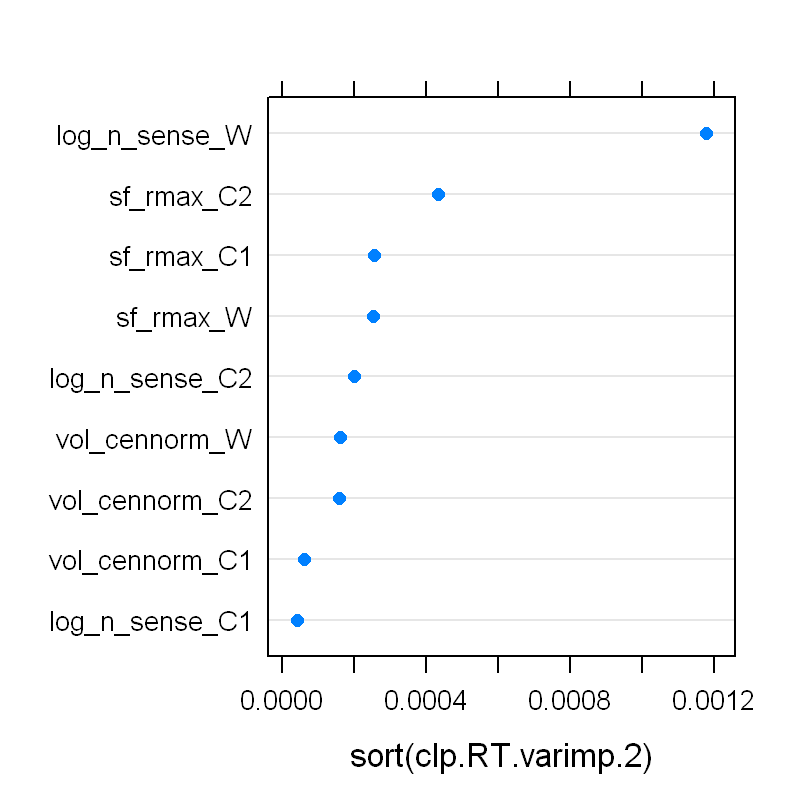

In [34]:
clp.RT.cf.2 <- cforest(RTinv ~ ., data=clp[,clp_variables.ex.freq])
clp.RT.varimp.2 = varimp(clp.RT.cf.2)
options(repr.plot.width=4, repr.plot.height=4)
dotplot(sort(clp.RT.varimp.2), main=list(cex=2))

In [38]:
m.0 = bam(RTinv~s(log_freq_W)+s(log_freq_C1)+s(log_freq_C2)
          +s(log_n_sense_W)+s(sf_rmax_W)+s(vol_cennorm_W)
          +s(log_n_sense_C1)+s(sf_rmax_C1)+s(vol_cennorm_C1)
          +s(log_n_sense_C2)+s(sf_rmax_C2)+s(vol_cennorm_C2), data=clp)

In [39]:
summary(m.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + s(log_freq_C1) + s(log_freq_C2) + s(log_n_sense_W) + 
    s(sf_rmax_W) + s(vol_cennorm_W) + s(log_n_sense_C1) + s(sf_rmax_C1) + 
    s(vol_cennorm_C1) + s(log_n_sense_C2) + s(sf_rmax_C2) + s(vol_cennorm_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.637403   0.002343  -698.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df       F  p-value    
s(log_freq_W)     3.685  4.672 265.632  < 2e-16 ***
s(log_freq_C1)    2.863  3.637  20.990  < 2e-16 ***
s(log_freq_C2)    4.442  5.540  17.461  < 2e-16 ***
s(log_n_sense_W)  1.524  1.865   2.633  0.12868    
s(sf_rmax_W)      1.100  1.190   1.560  0.23179    
s(vol_cennorm_W)  1.000  1.000   3.853  0.04974 *  
s(log_n_sense_C1) 1.000  1.000   7.979  0.00476 ** 
s(sf_rmax_C1)     2.633  3.325   2.680  0.03937 *  
s(v

In [43]:
m.01 = bam(RTinv~s(log_freq_W)+s(log_freq_C1)+s(log_freq_C2)
          +s(vol_cennorm_W)
          +s(log_n_sense_C1)+s(sf_rmax_C1)+
          +s(log_n_sense_C2)+s(sf_rmax_C2), data=clp)

In [45]:
summary(m.01)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + s(log_freq_C1) + s(log_freq_C2) + s(vol_cennorm_W) + 
    s(log_n_sense_C1) + s(sf_rmax_C1) + +s(log_n_sense_C2) + 
    s(sf_rmax_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.637403   0.002351  -696.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df       F  p-value    
s(log_freq_W)     3.816  4.827 295.078  < 2e-16 ***
s(log_freq_C1)    2.883  3.663  22.525  < 2e-16 ***
s(log_freq_C2)    4.258  5.331  18.371  < 2e-16 ***
s(vol_cennorm_W)  1.000  1.000   3.433 0.064022 .  
s(log_n_sense_C1) 1.000  1.000  11.138 0.000856 ***
s(sf_rmax_C1)     2.656  3.351   2.686 0.038750 *  
s(log_n_sense_C2) 2.595  3.317   3.252 0.017315 *  
s(sf_rmax_C2)     5.178  6.338   5.585 6.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(ad

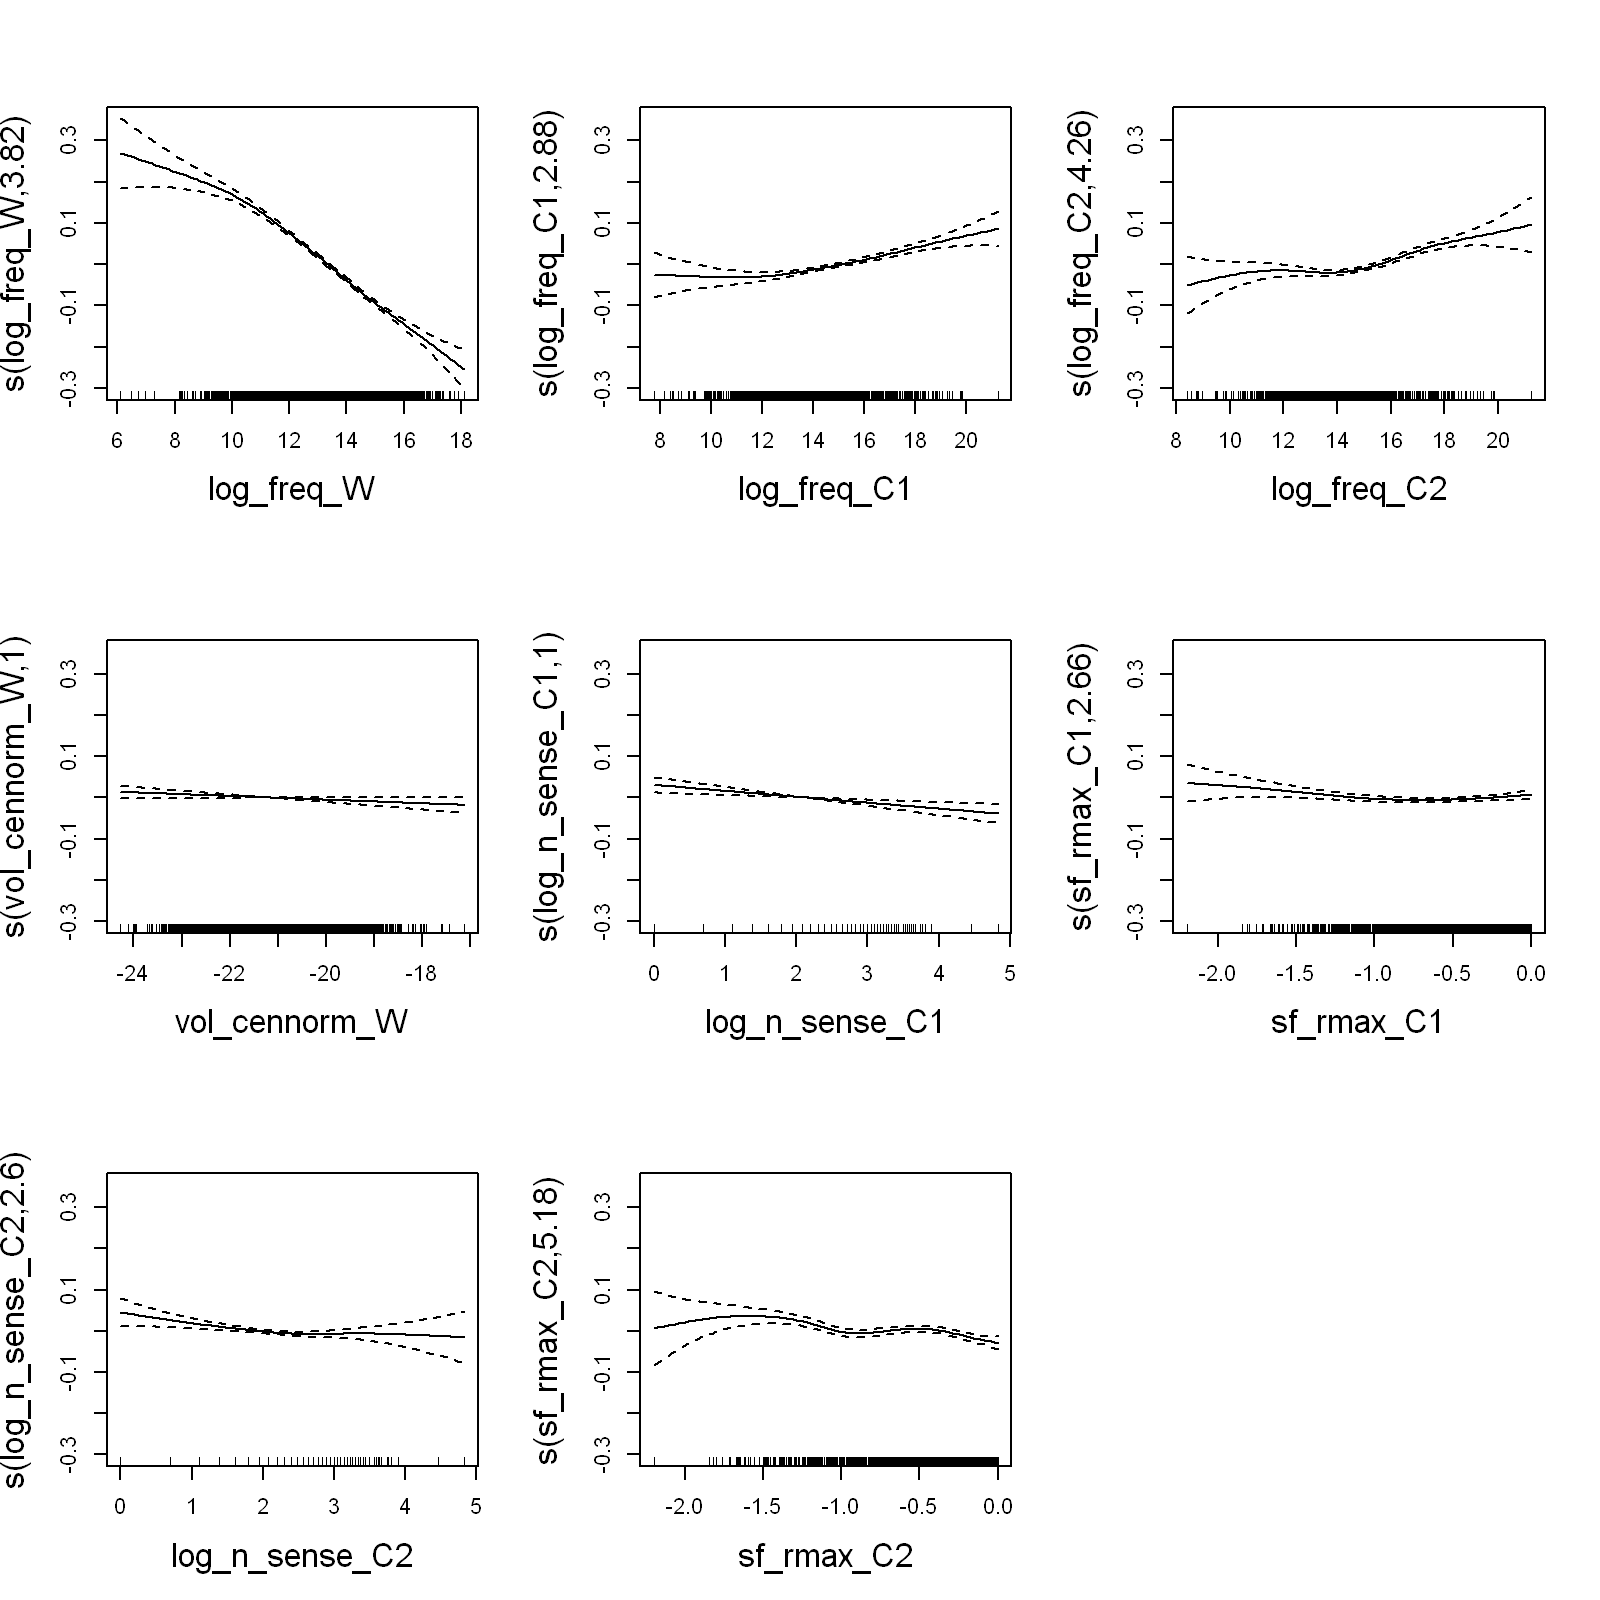

In [46]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plot(m.01, cex.lab=1.5, pages=1)

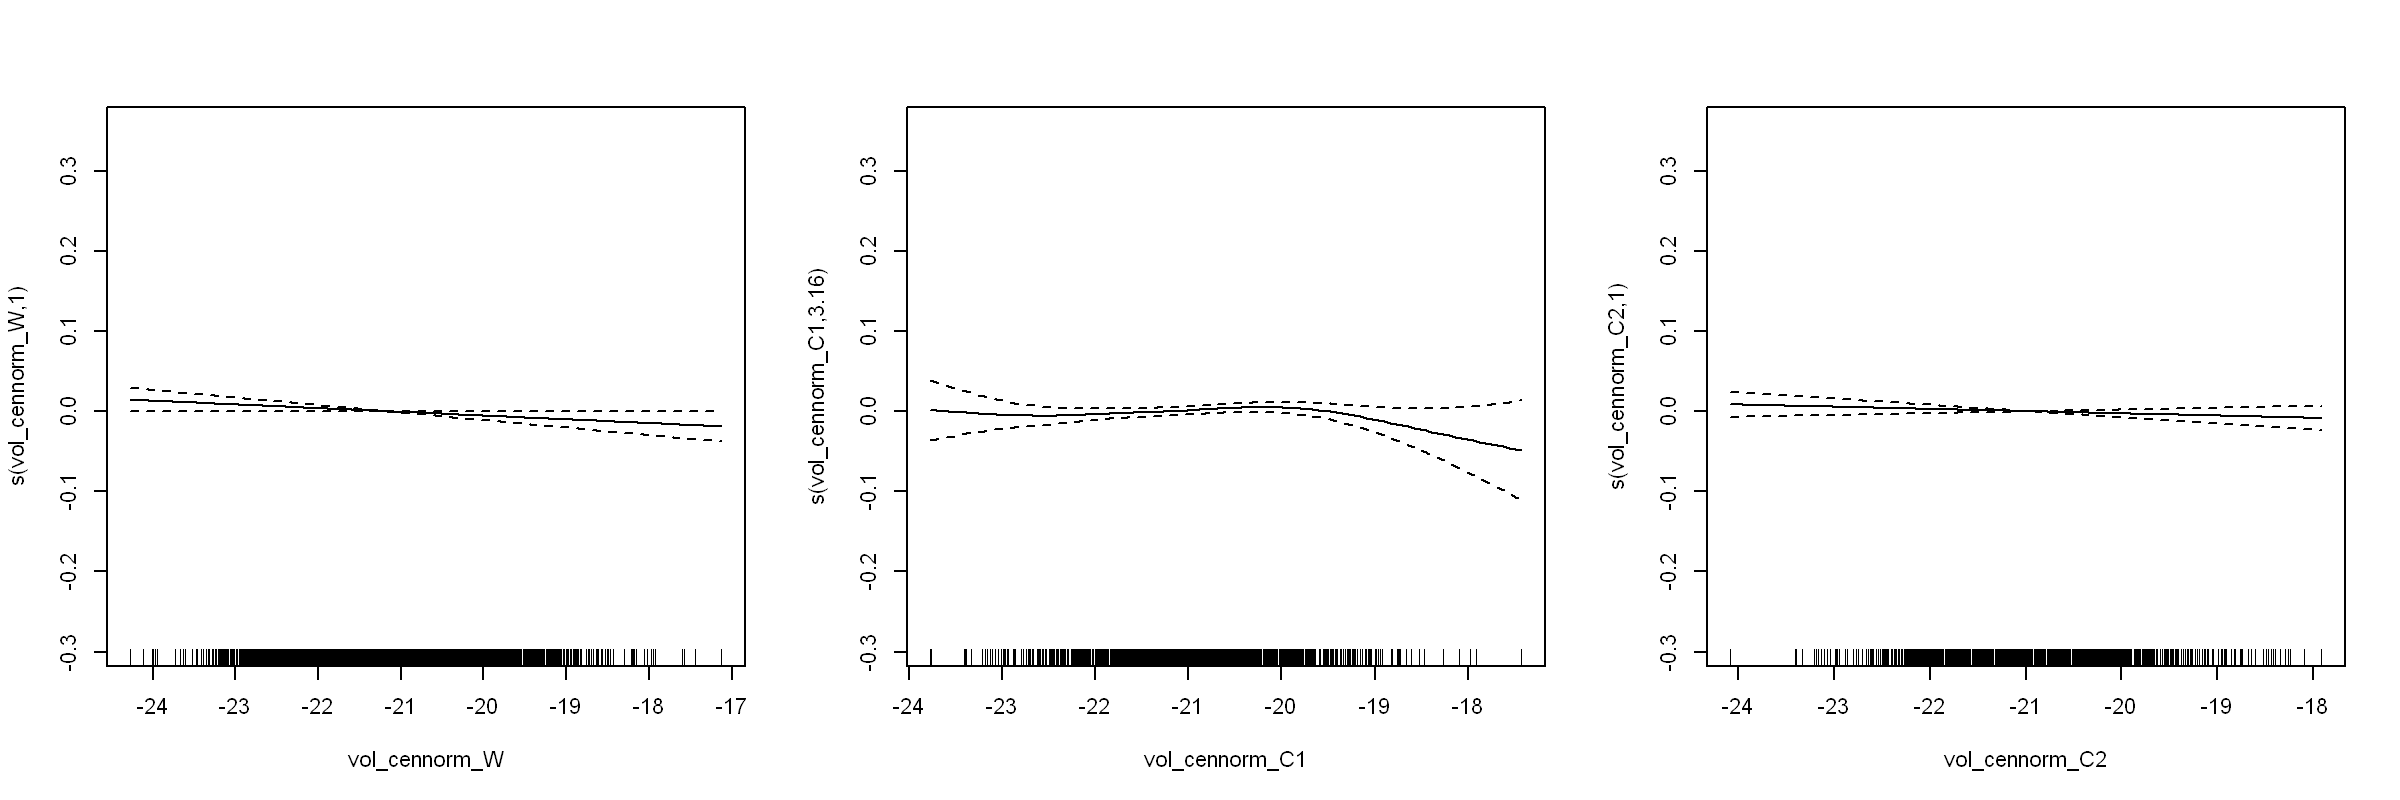

In [54]:
par(mfrow=c(1, 3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=200)
plot(m.0, select=6)
plot(m.0, select=9)
plot(m.0, select=12)

## Interaction terms

In [76]:
## helper function to plot interaction
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }
plot_int = function(model, idx, x, y){
    popt(12, 6)
    par(mfrow=c(1,2))
    plot(model, select=idx)
    vis.gam(model, view=c(x, y), plot.type="contour", color="topo", too.far=0.1)
}

In [74]:
m.1 = bam(RTinv~s(log_freq_W) + te(log_freq_C1, log_freq_C2)
          +s(vol_cennorm_W)
          +te(log_n_sense_C1, log_n_sense_C2)+
          +te(sf_rmax_C1, sf_rmax_C2), data=clp)

In [75]:
summary(m.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(vol_cennorm_W) + 
    te(log_n_sense_C1, log_n_sense_C2) + +te(sf_rmax_C1, sf_rmax_C2)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.637403   0.002352  -696.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                                    edf Ref.df       F  p-value    
s(log_freq_W)                     3.849  4.867 296.932  < 2e-16 ***
te(log_freq_C1,log_freq_C2)       9.620 12.209  17.744  < 2e-16 ***
s(vol_cennorm_W)                  1.000  1.000   3.725 0.053691 .  
te(log_n_sense_C1,log_n_sense_C2) 3.620  4.042   5.634 0.000156 ***
te(sf_rmax_C1,sf_rmax_C2)         6.821  8.746   4.143 3.93e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.341   Deviance explained = 34.7%
fREML = -1848.7  Scale est. = 0.0

In [80]:
compareML(m.01, m.1)

m.01: RTinv ~ s(log_freq_W) + s(log_freq_C1) + s(log_freq_C2) + s(vol_cennorm_W) + 
    s(log_n_sense_C1) + s(sf_rmax_C1) + +s(log_n_sense_C2) + 
    s(sf_rmax_C2)

m.1: RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(vol_cennorm_W) + 
    te(log_n_sense_C1, log_n_sense_C2) + +te(sf_rmax_C1, sf_rmax_C2)

Chi-square test of fREML scores
-----
  Model     Score Edf Difference    Df   p.value Sig.
1  m.01 -1833.383  17                                
2   m.1 -1848.713  20     15.330 3.000 1.003e-06  ***

AIC difference: -4.91, model m.01 has lower AIC.



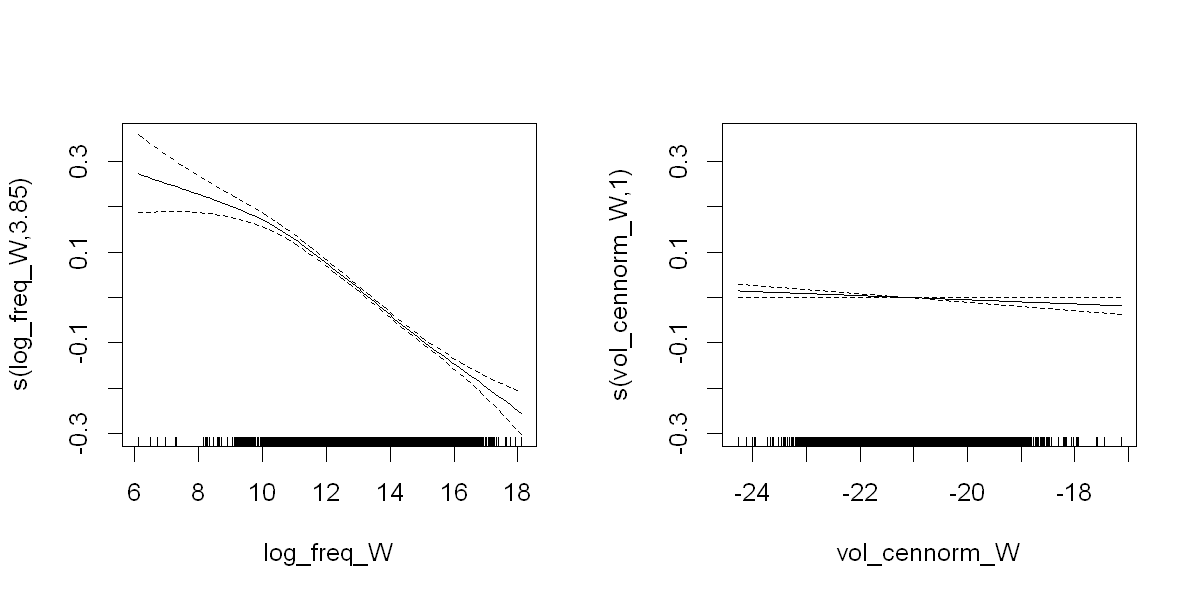

In [110]:
popt(8, 4, 150)
par(mfrow=c(1, 2))
plot(m.1, select=1)
plot(m.1, select=3)

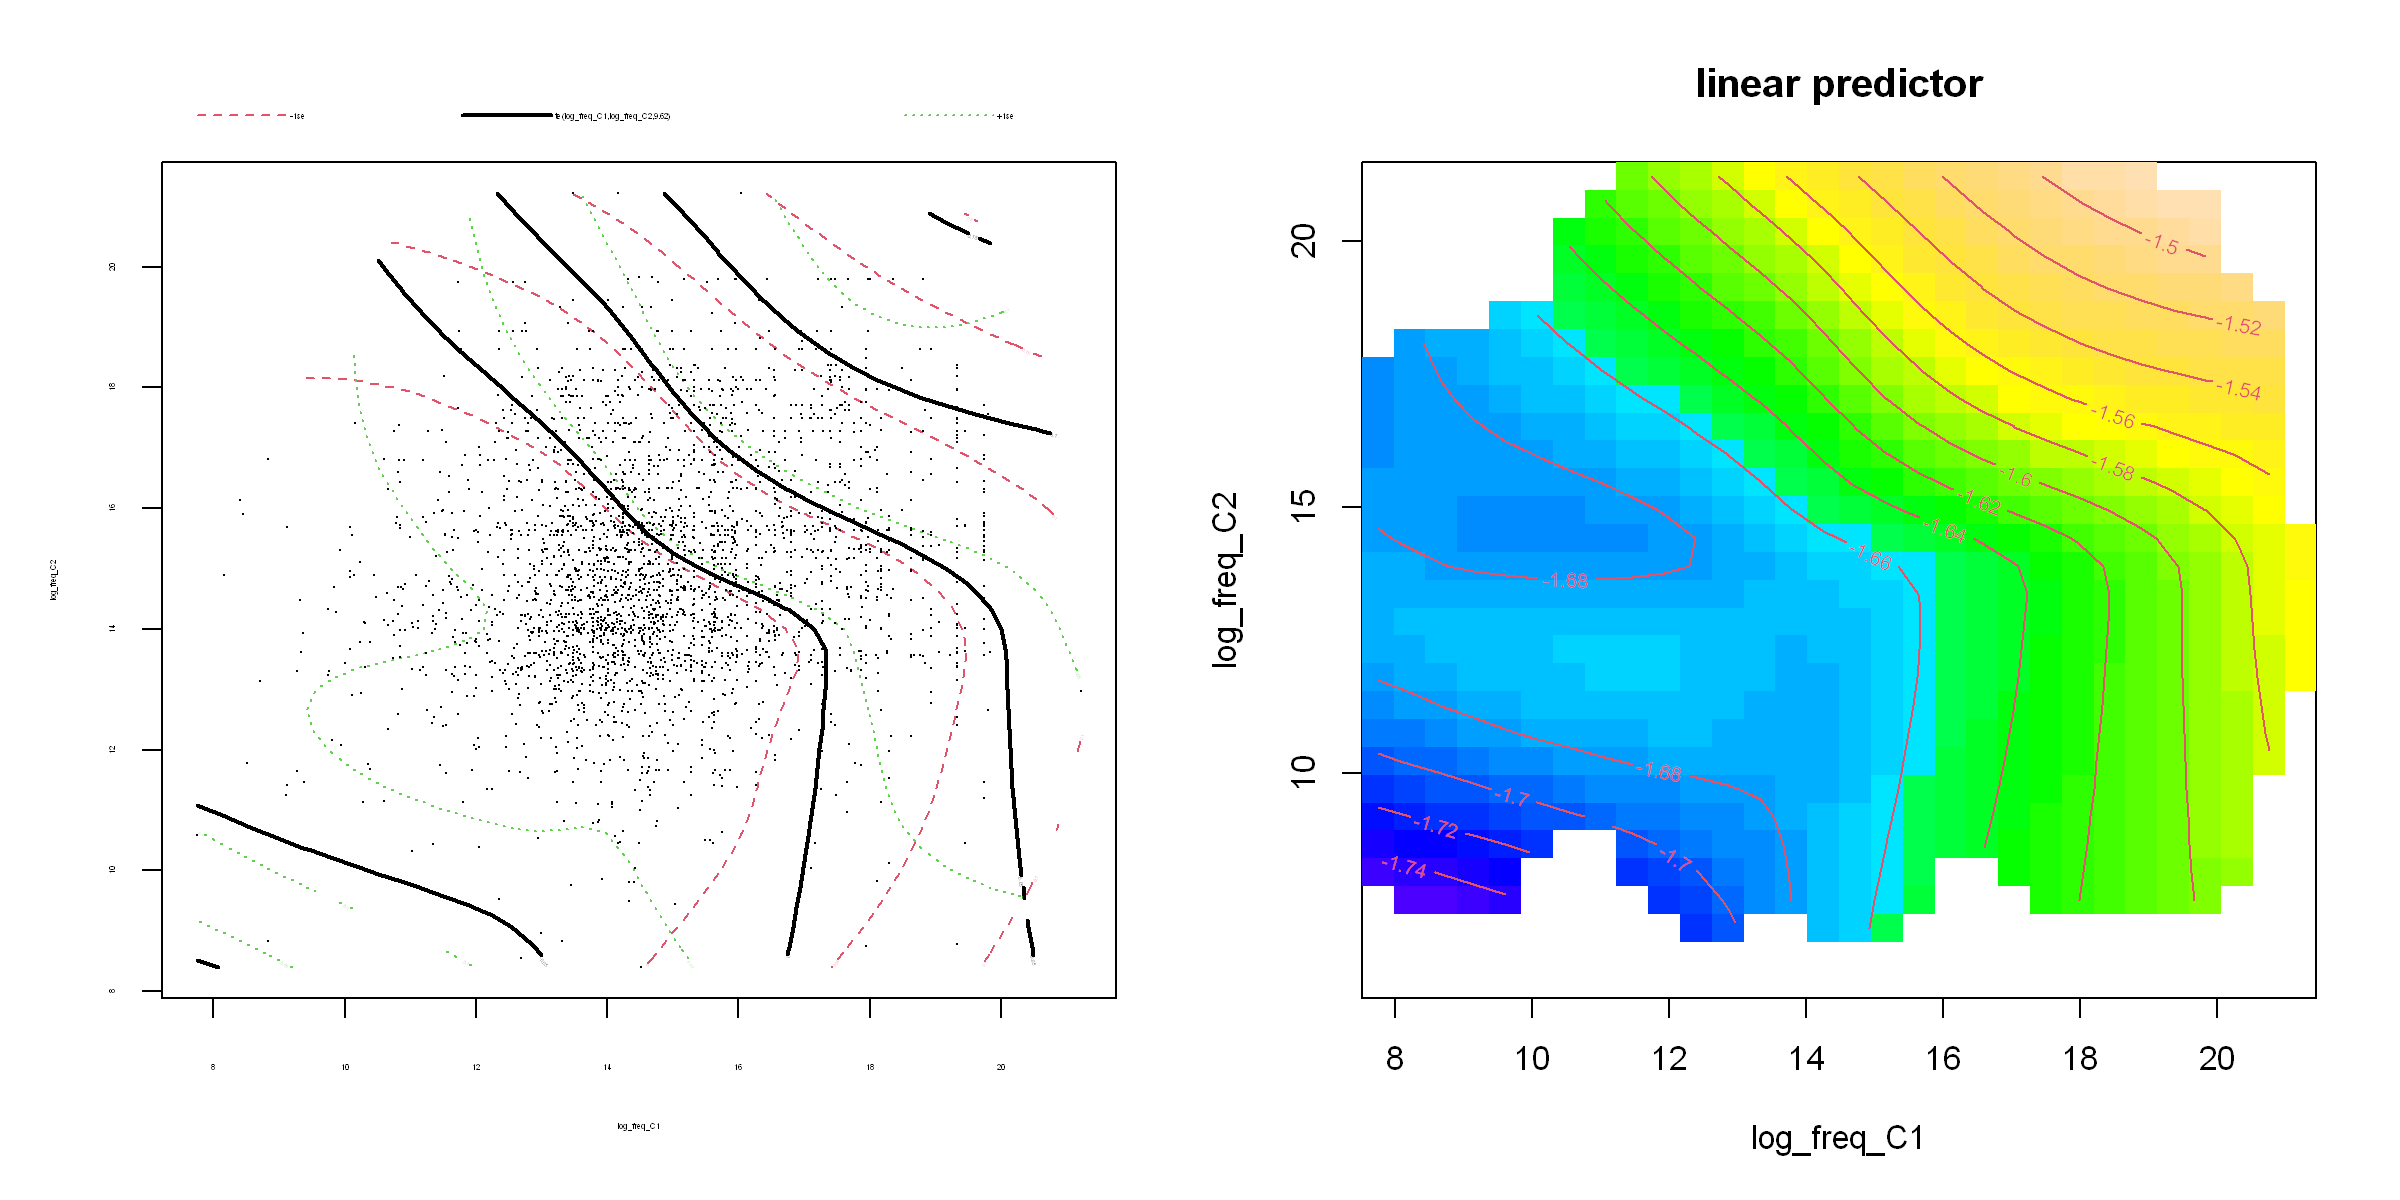

In [77]:
plot_int(m.1, 2, "log_freq_C1", "log_freq_C2")

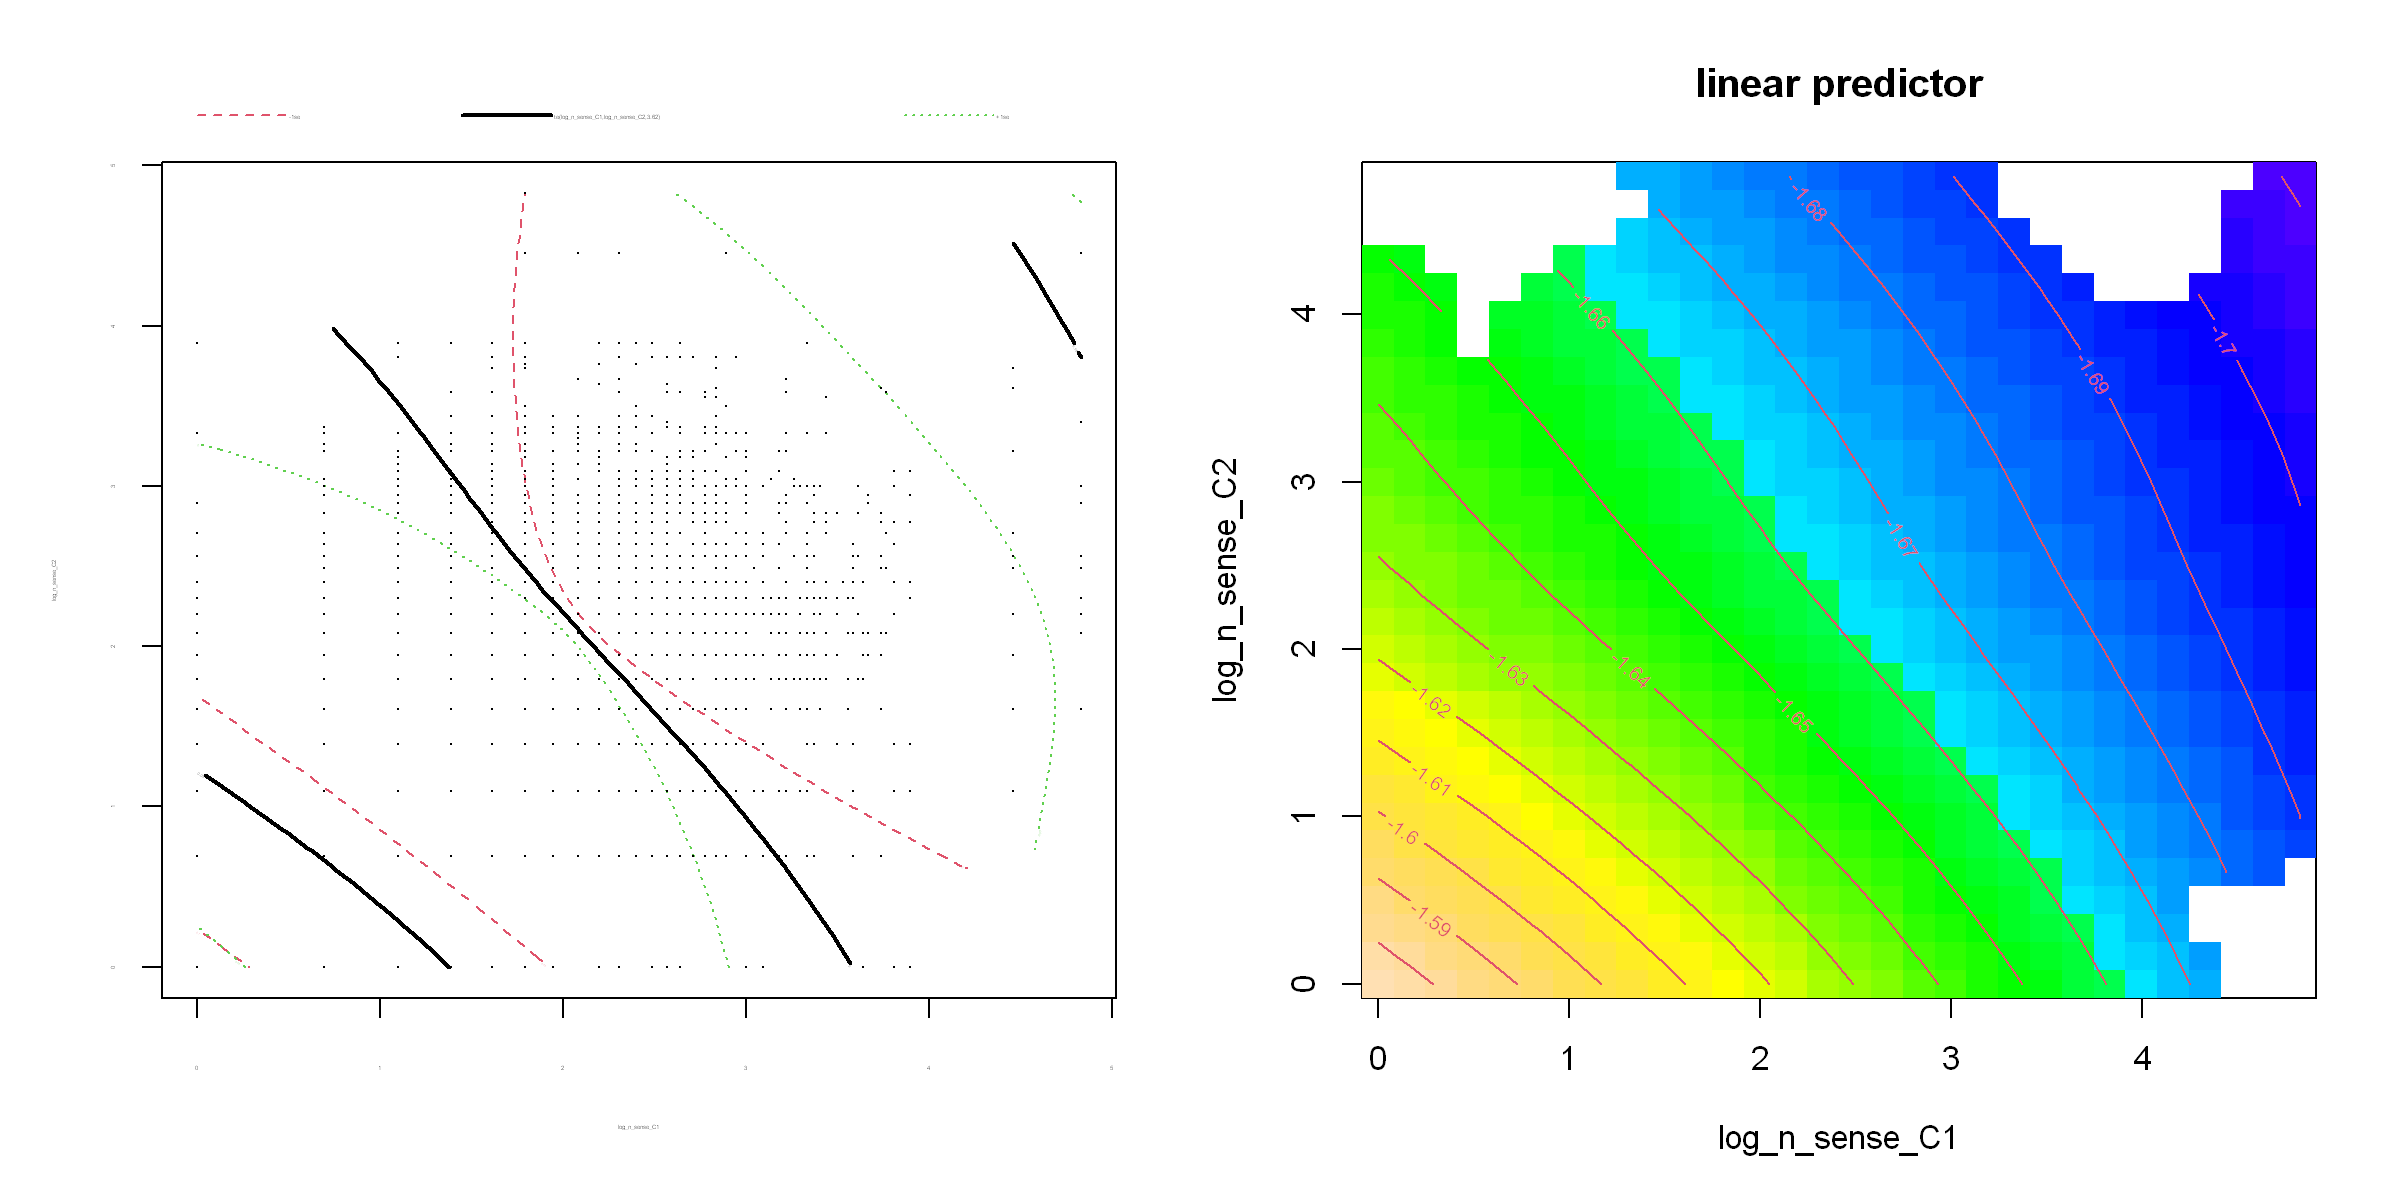

In [93]:
plot_int(m.1, 4, "log_n_sense_C1", "log_n_sense_C2")

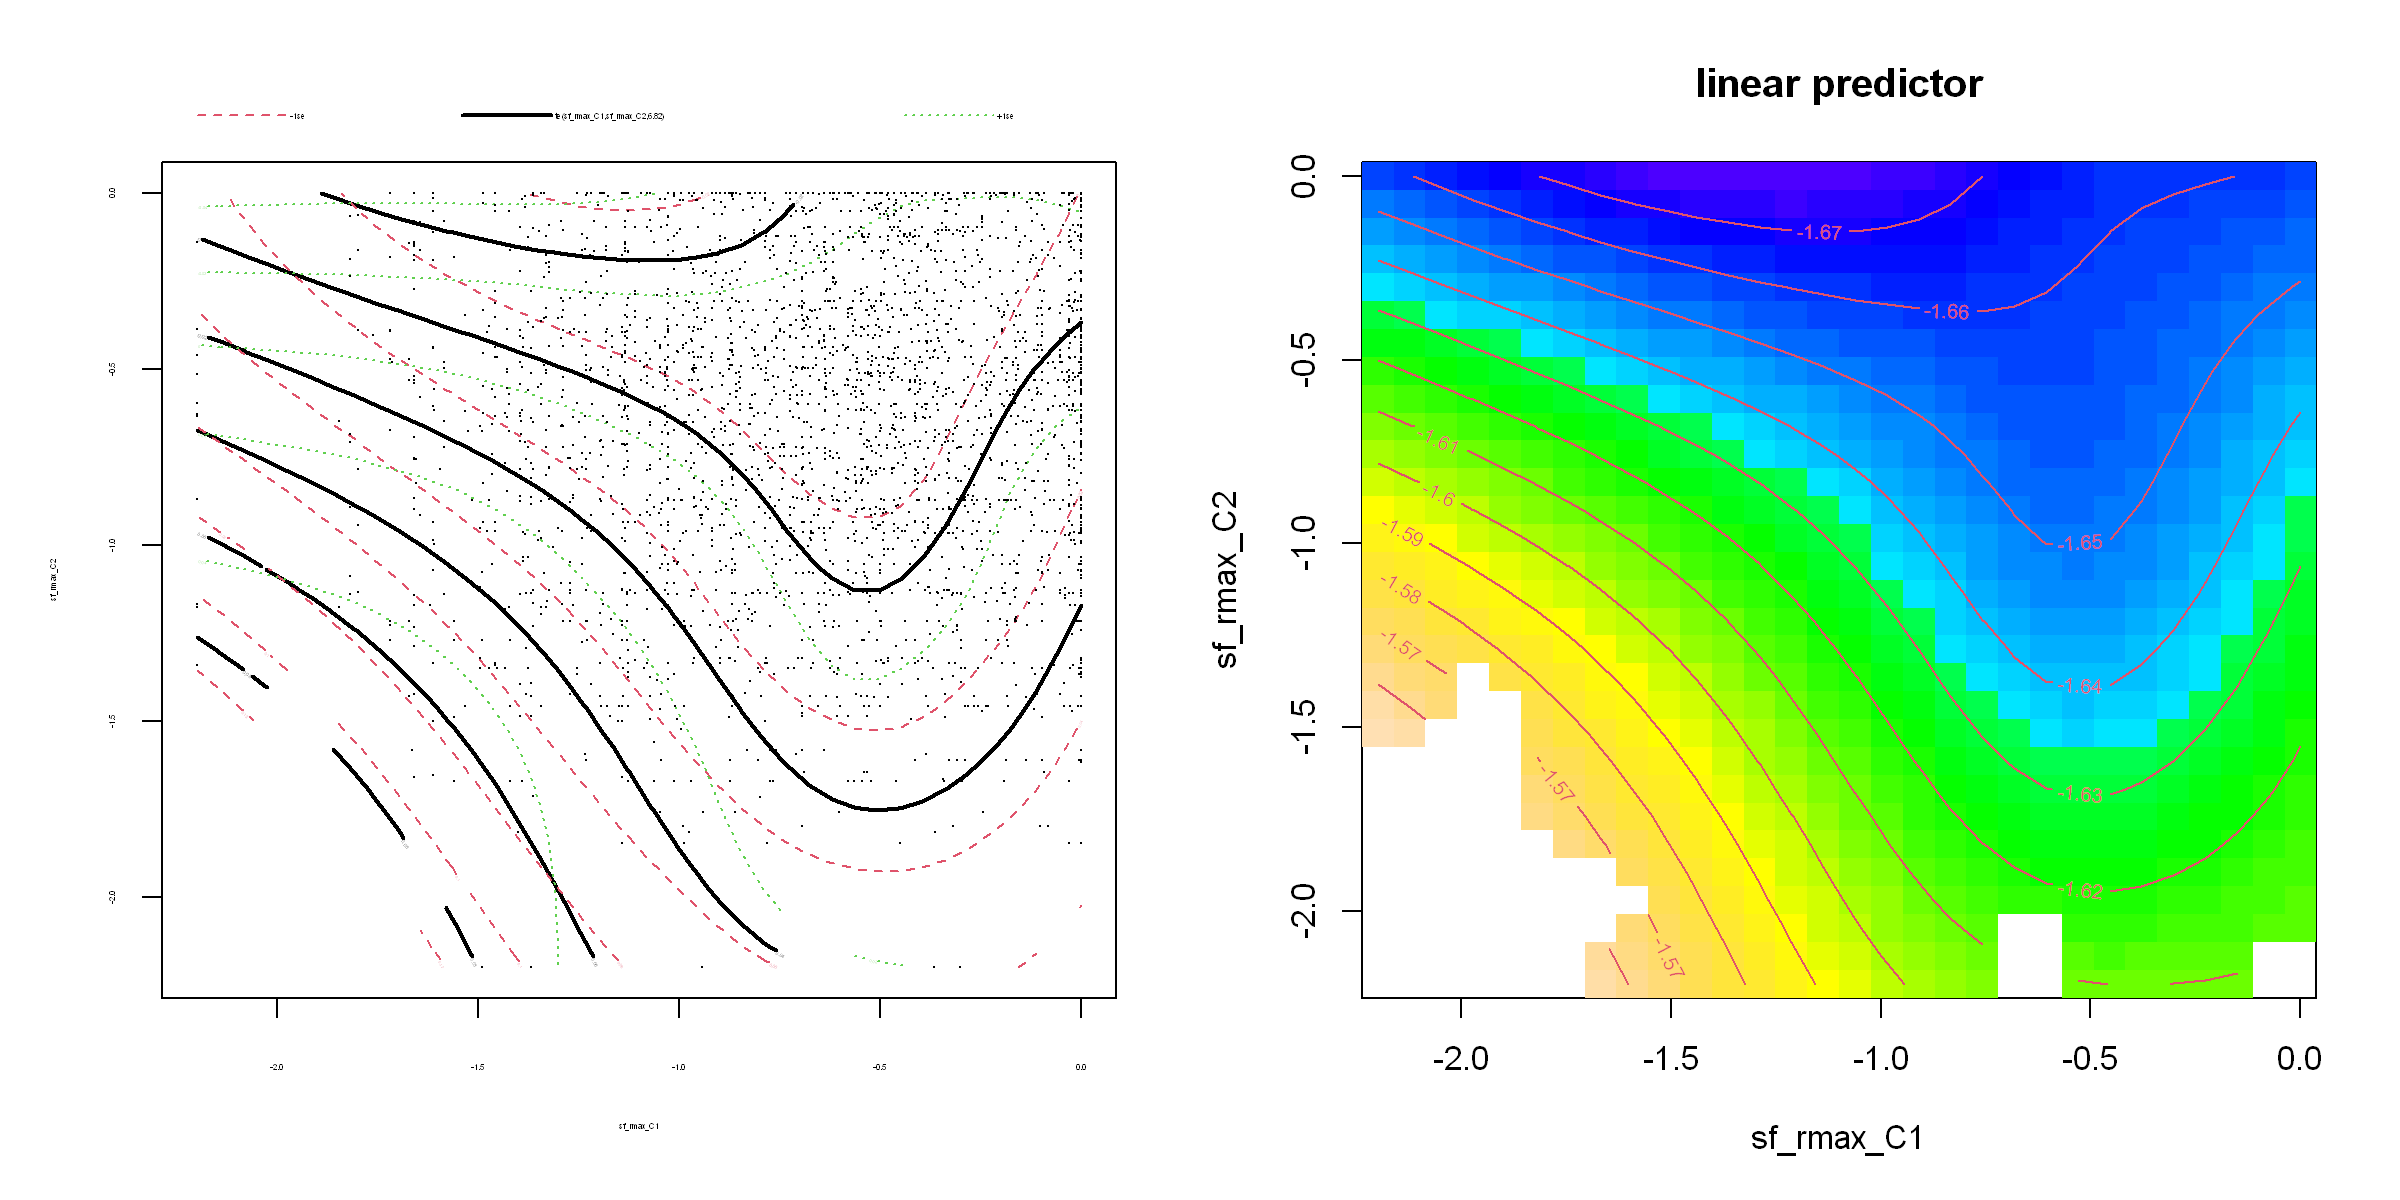

In [81]:
plot_int(m.1, 5, "sf_rmax_C1", "sf_rmax_C2")

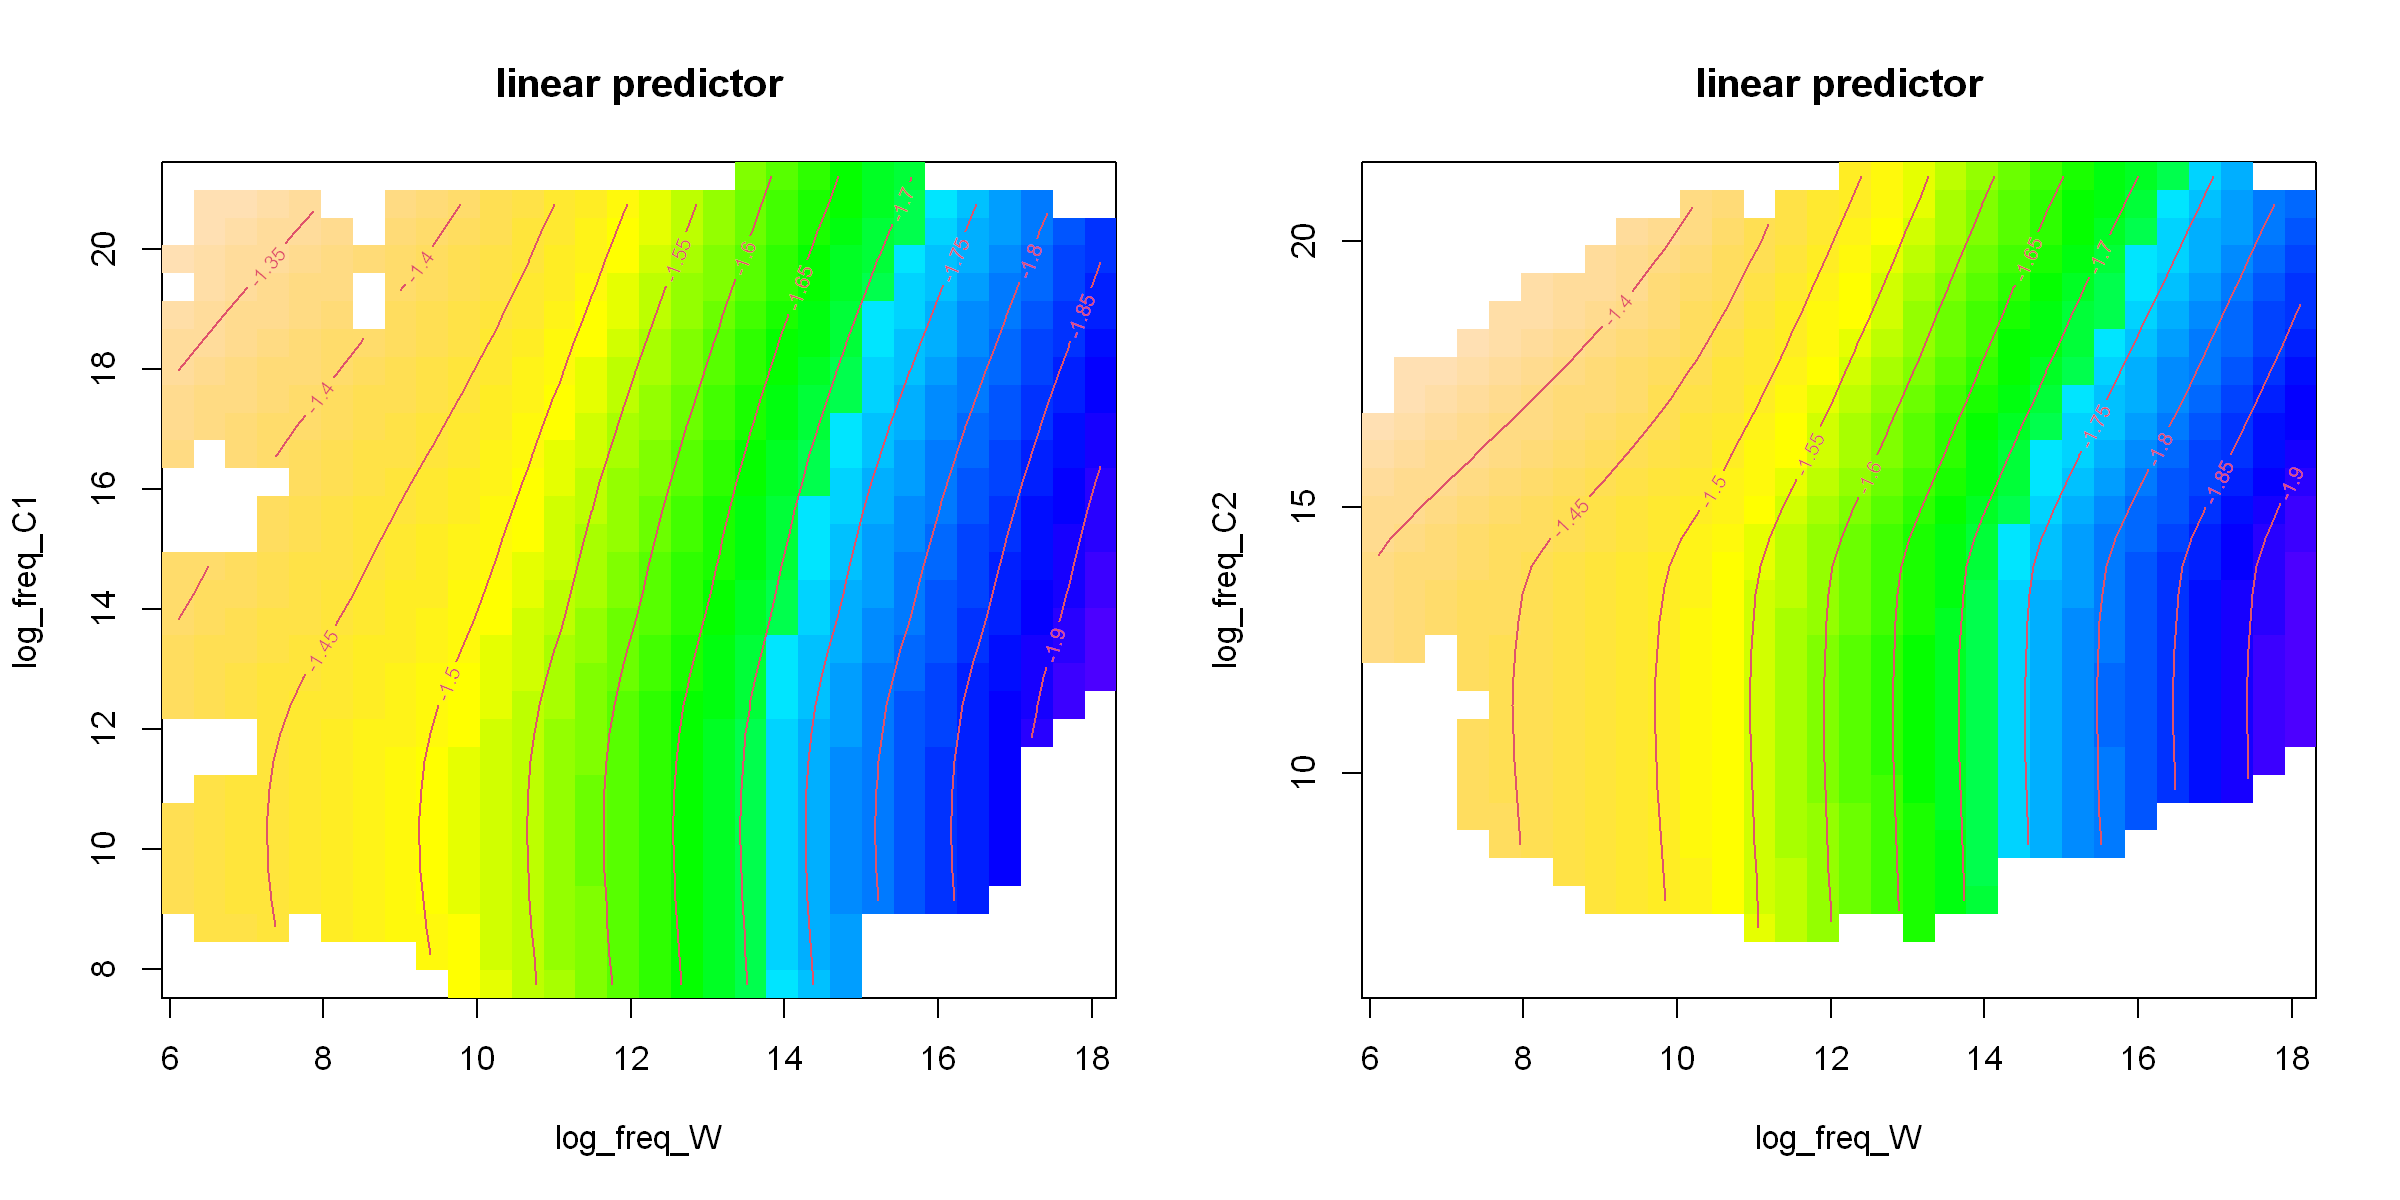

In [98]:
popt(12, 6)
par(mfrow=c(1, 2))
vis.gam(m.1, view=c("log_freq_W", "log_freq_C1"), plot.type="contour", color="topo", too.far=0.1)
vis.gam(m.1, view=c("log_freq_W", "log_freq_C2"), plot.type="contour", color="topo", too.far=0.1)

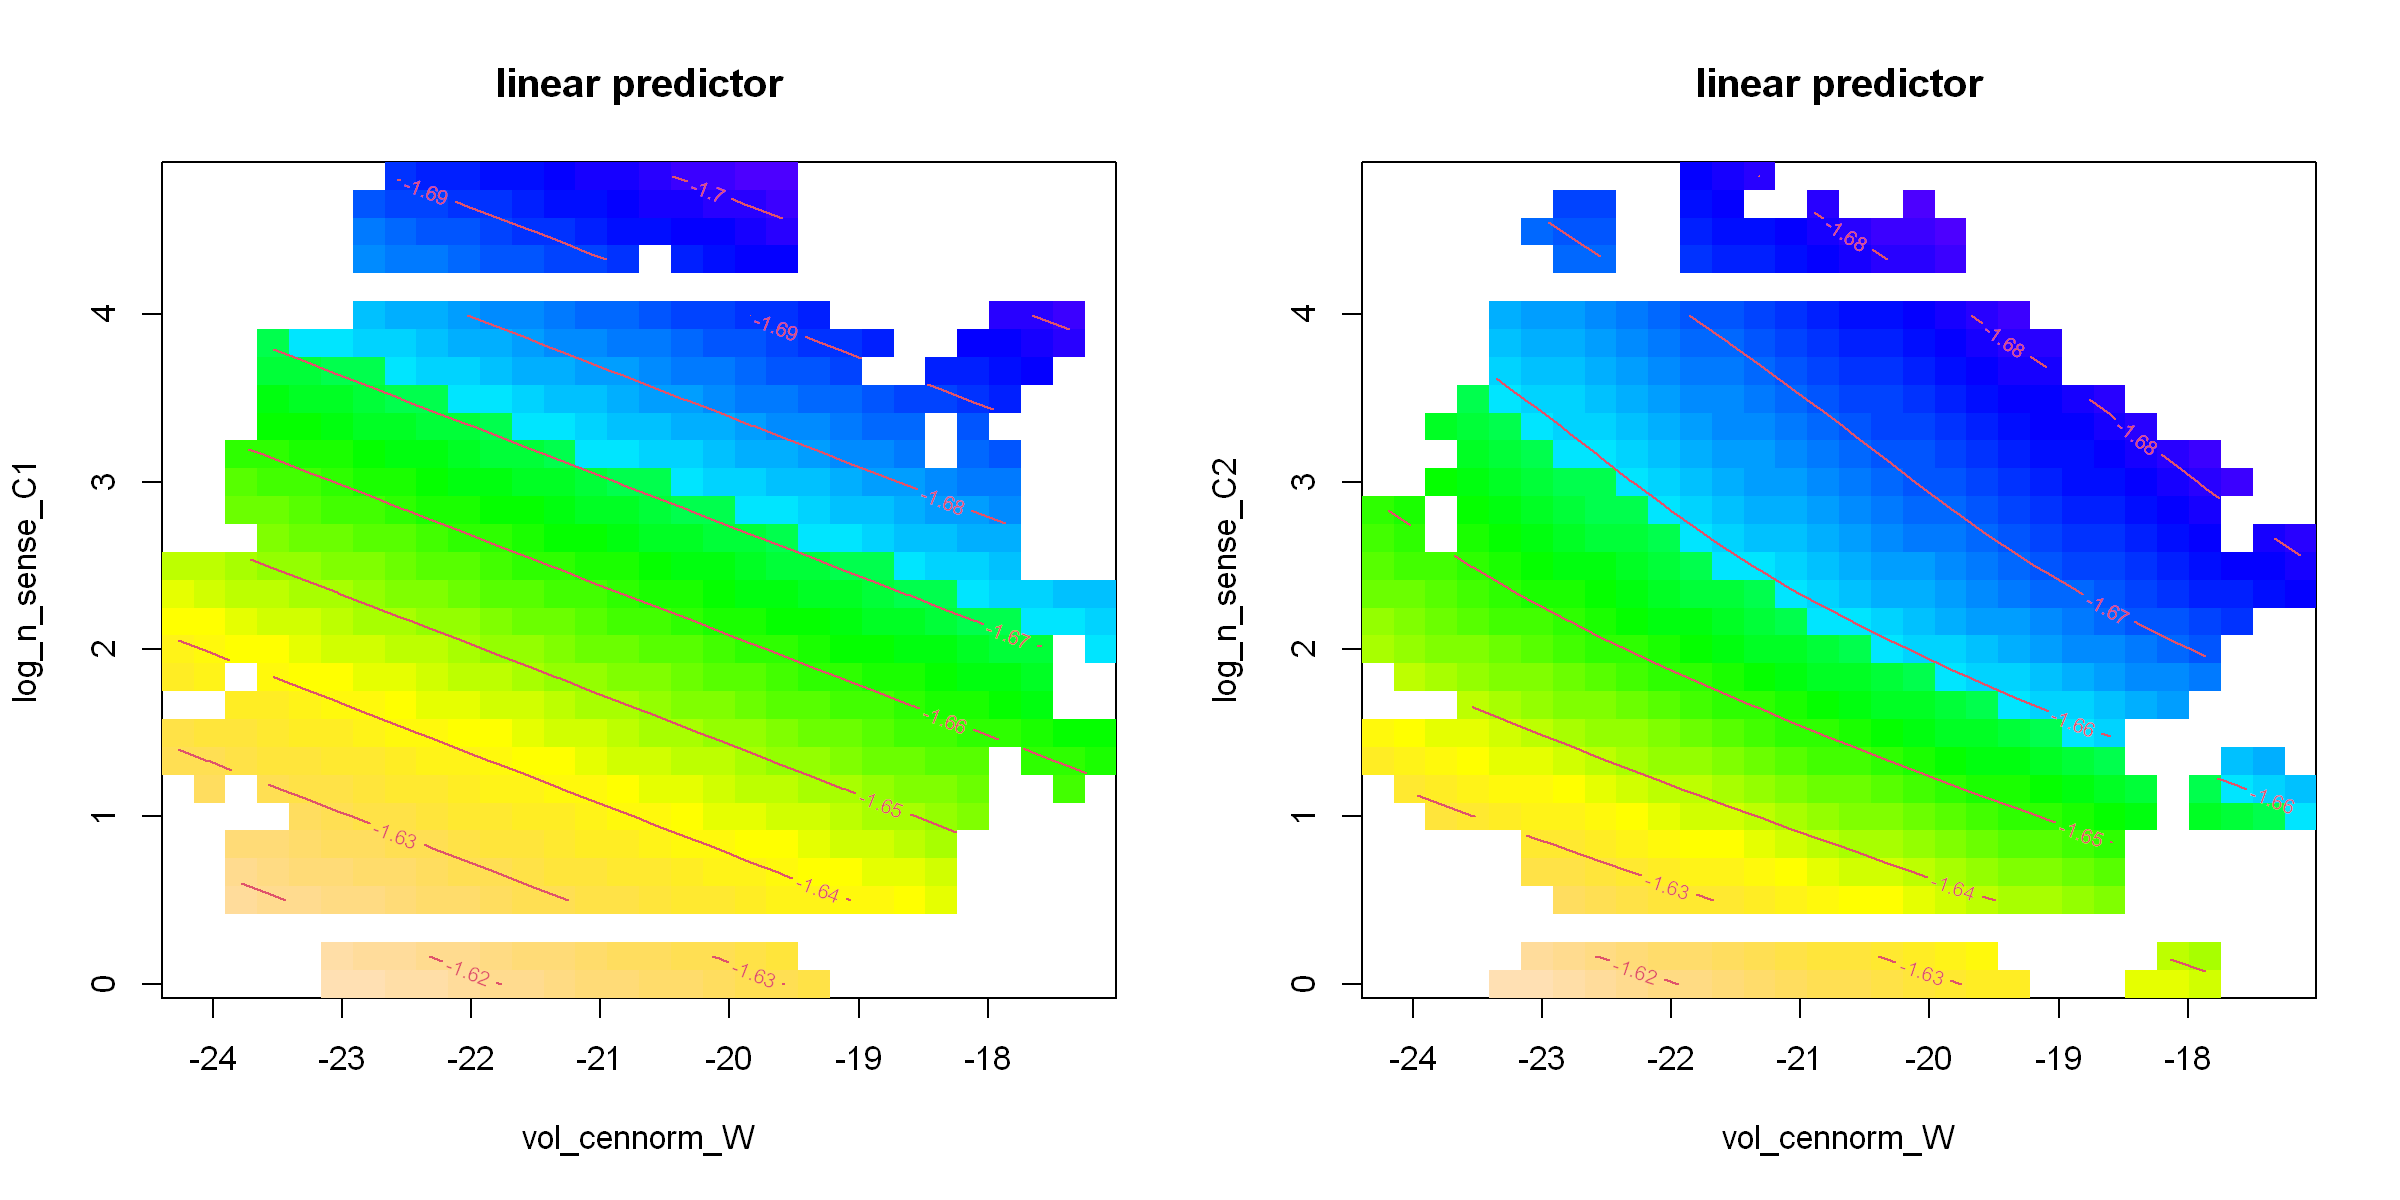

In [107]:
popt(12, 6)
par(mfrow=c(1, 2))
vis.gam(m.1, view=c("vol_cennorm_W", "log_n_sense_C1"), plot.type="contour", color="topo", too.far=0.05)
vis.gam(m.1, view=c("vol_cennorm_W", "log_n_sense_C2"), plot.type="contour", color="topo", too.far=0.05)

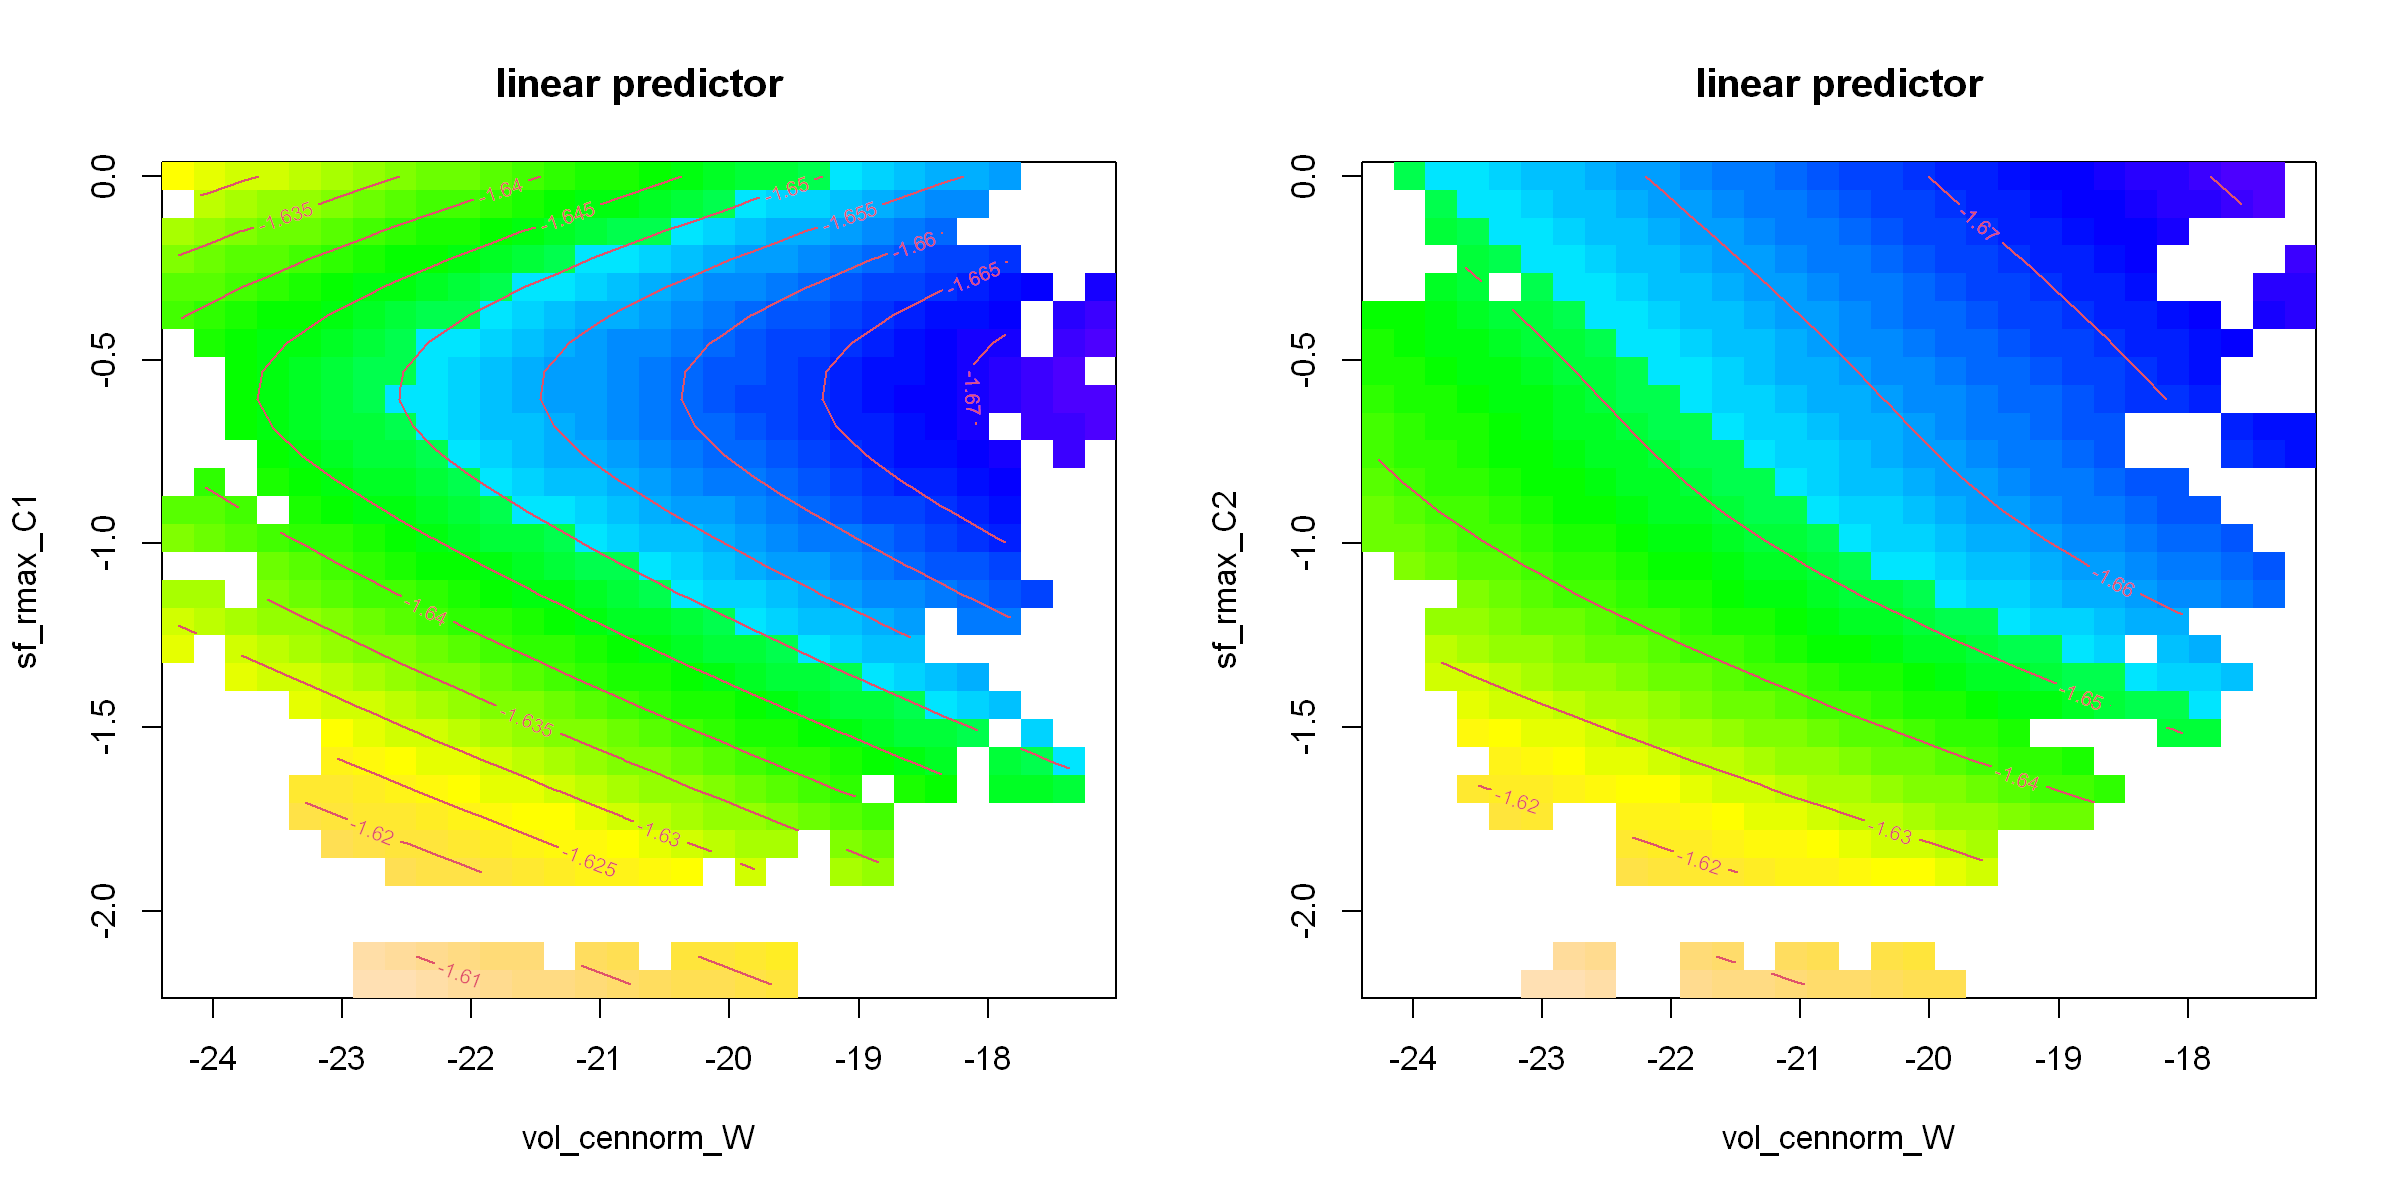

In [106]:
popt(12, 6)
par(mfrow=c(1, 2))
vis.gam(m.1, view=c("vol_cennorm_W", "sf_rmax_C1"), plot.type="contour", color="topo", too.far=0.05)
vis.gam(m.1, view=c("vol_cennorm_W", "sf_rmax_C2"), plot.type="contour", color="topo", too.far=0.05)

In [122]:
m.2 = bam(RTinv~s(log_freq_W) + te(log_freq_C1, log_freq_C2)
          +s(vol_cennorm_W) + s(vol_cennorm_C1) + s(vol_cennorm_C2)
          +te(log_n_sense_C1, log_n_sense_C2)+
          +te(sf_rmax_C1, sf_rmax_C2), data=clp)

In [123]:
summary(m.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq_W) + te(log_freq_C1, log_freq_C2) + s(vol_cennorm_W) + 
    s(vol_cennorm_C1) + s(vol_cennorm_C2) + te(log_n_sense_C1, 
    log_n_sense_C2) + +te(sf_rmax_C1, sf_rmax_C2)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.63740    0.00235  -696.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                                    edf Ref.df       F  p-value    
s(log_freq_W)                     3.859  4.878 296.939  < 2e-16 ***
te(log_freq_C1,log_freq_C2)       9.642 12.229  17.694  < 2e-16 ***
s(vol_cennorm_W)                  1.000  1.000   3.721 0.053826 .  
s(vol_cennorm_C1)                 3.232  4.096   1.475 0.210941    
s(vol_cennorm_C2)                 1.000  1.000   1.042 0.307437    
te(log_n_sense_C1,log_n_sense_C2) 3.493  3.853   5.778 0.000214 ***
te(sf_rmax_C1,sf_rmax_C2)         6.759

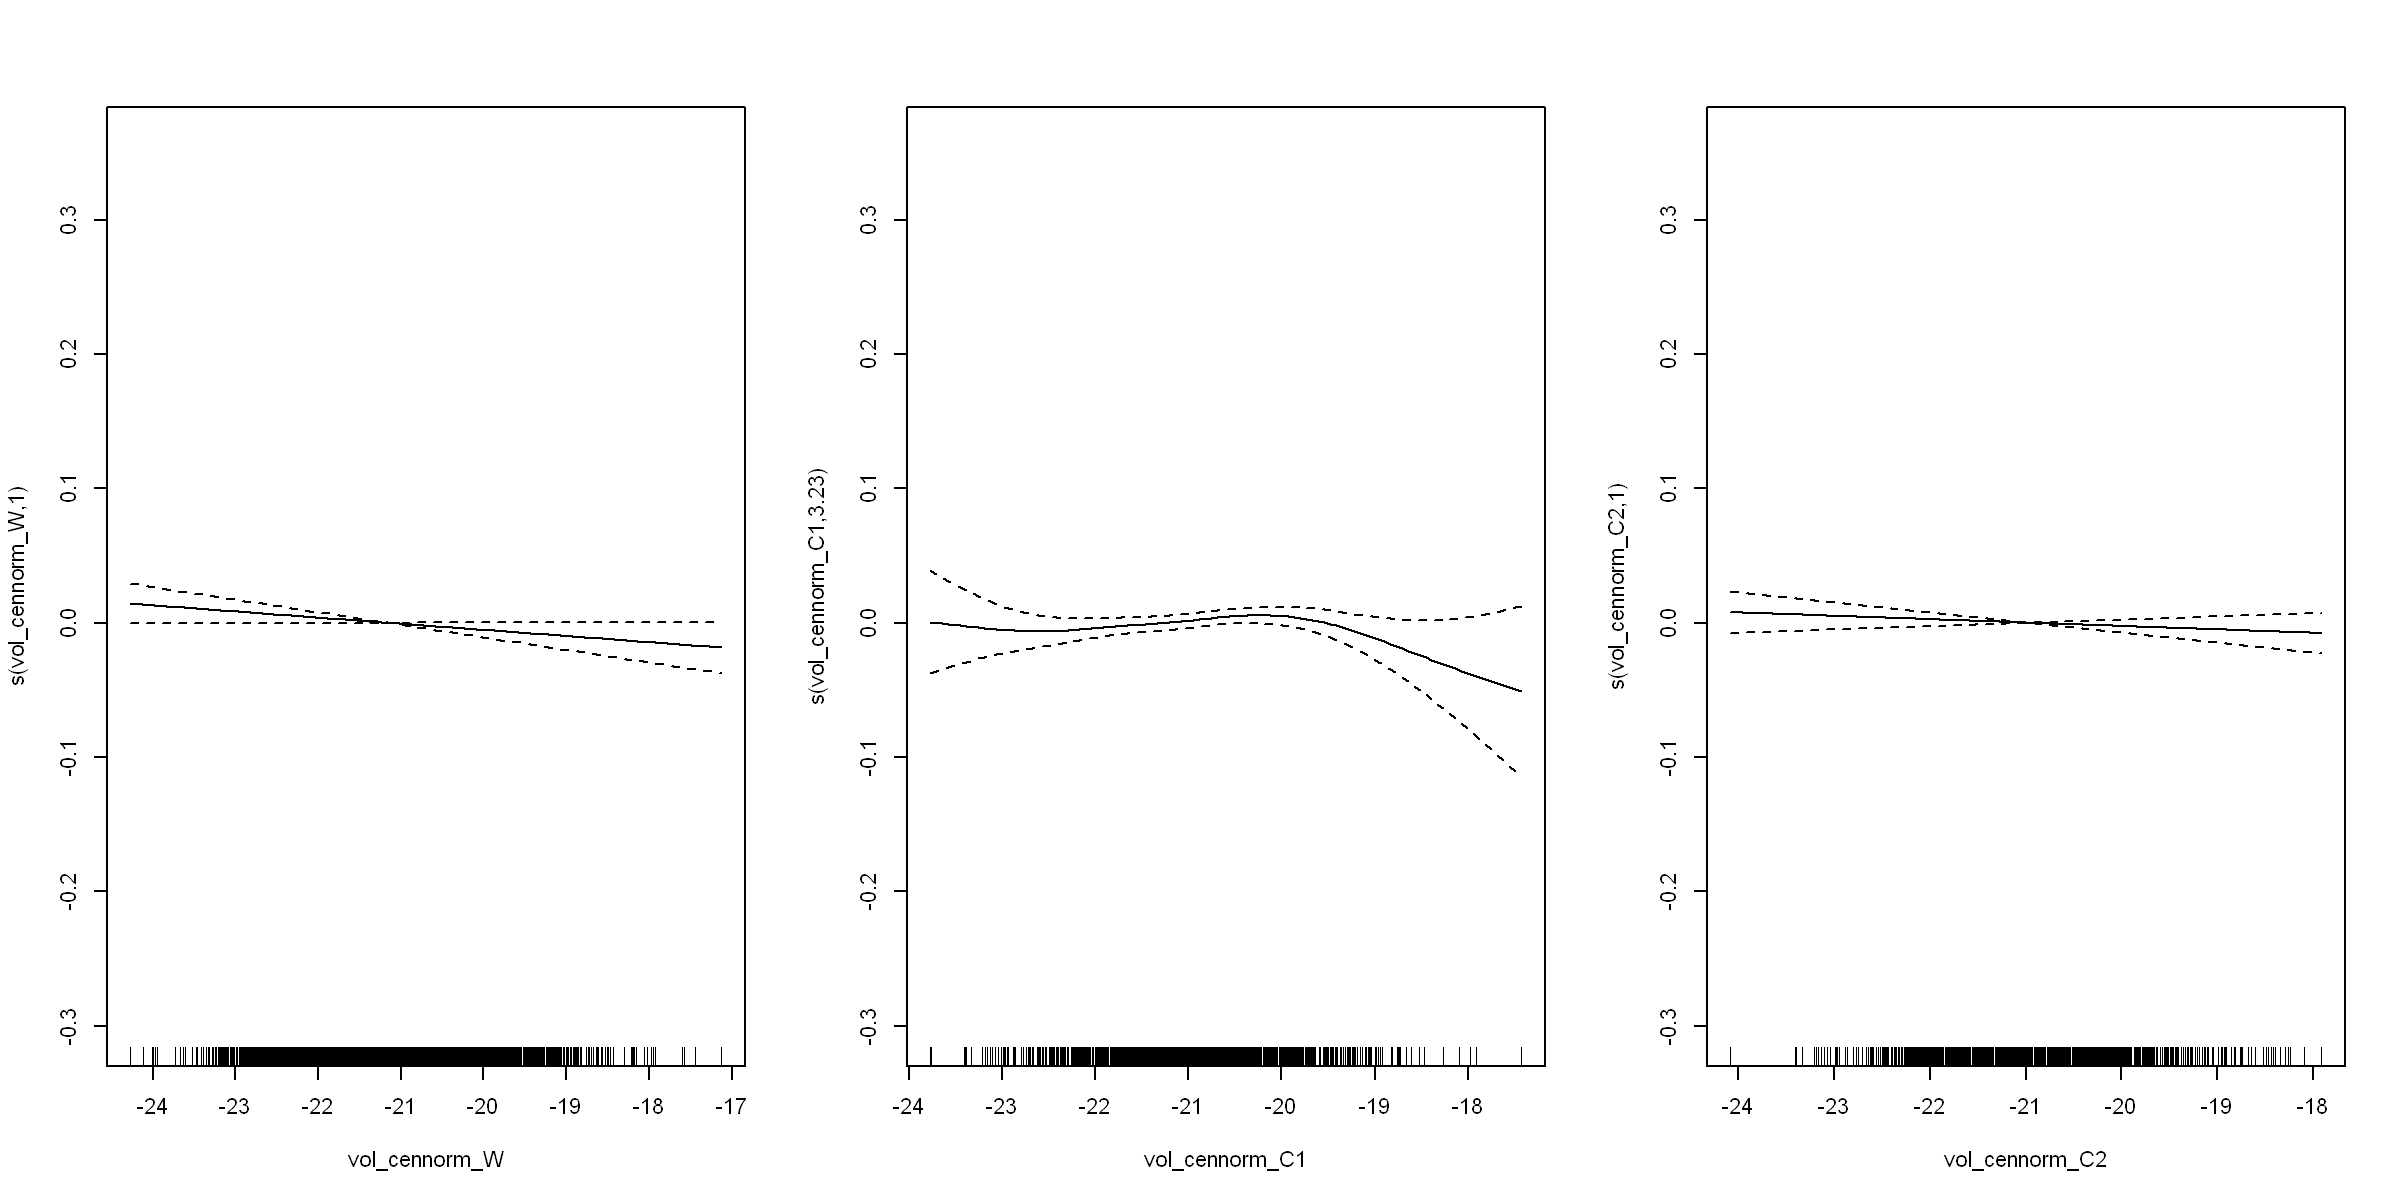

In [126]:
popt(12, 6)
par(mfrow=c(1, 3))
plot(m.2, select=3)
plot(m.2, select=4)
plot(m.2, select=5)

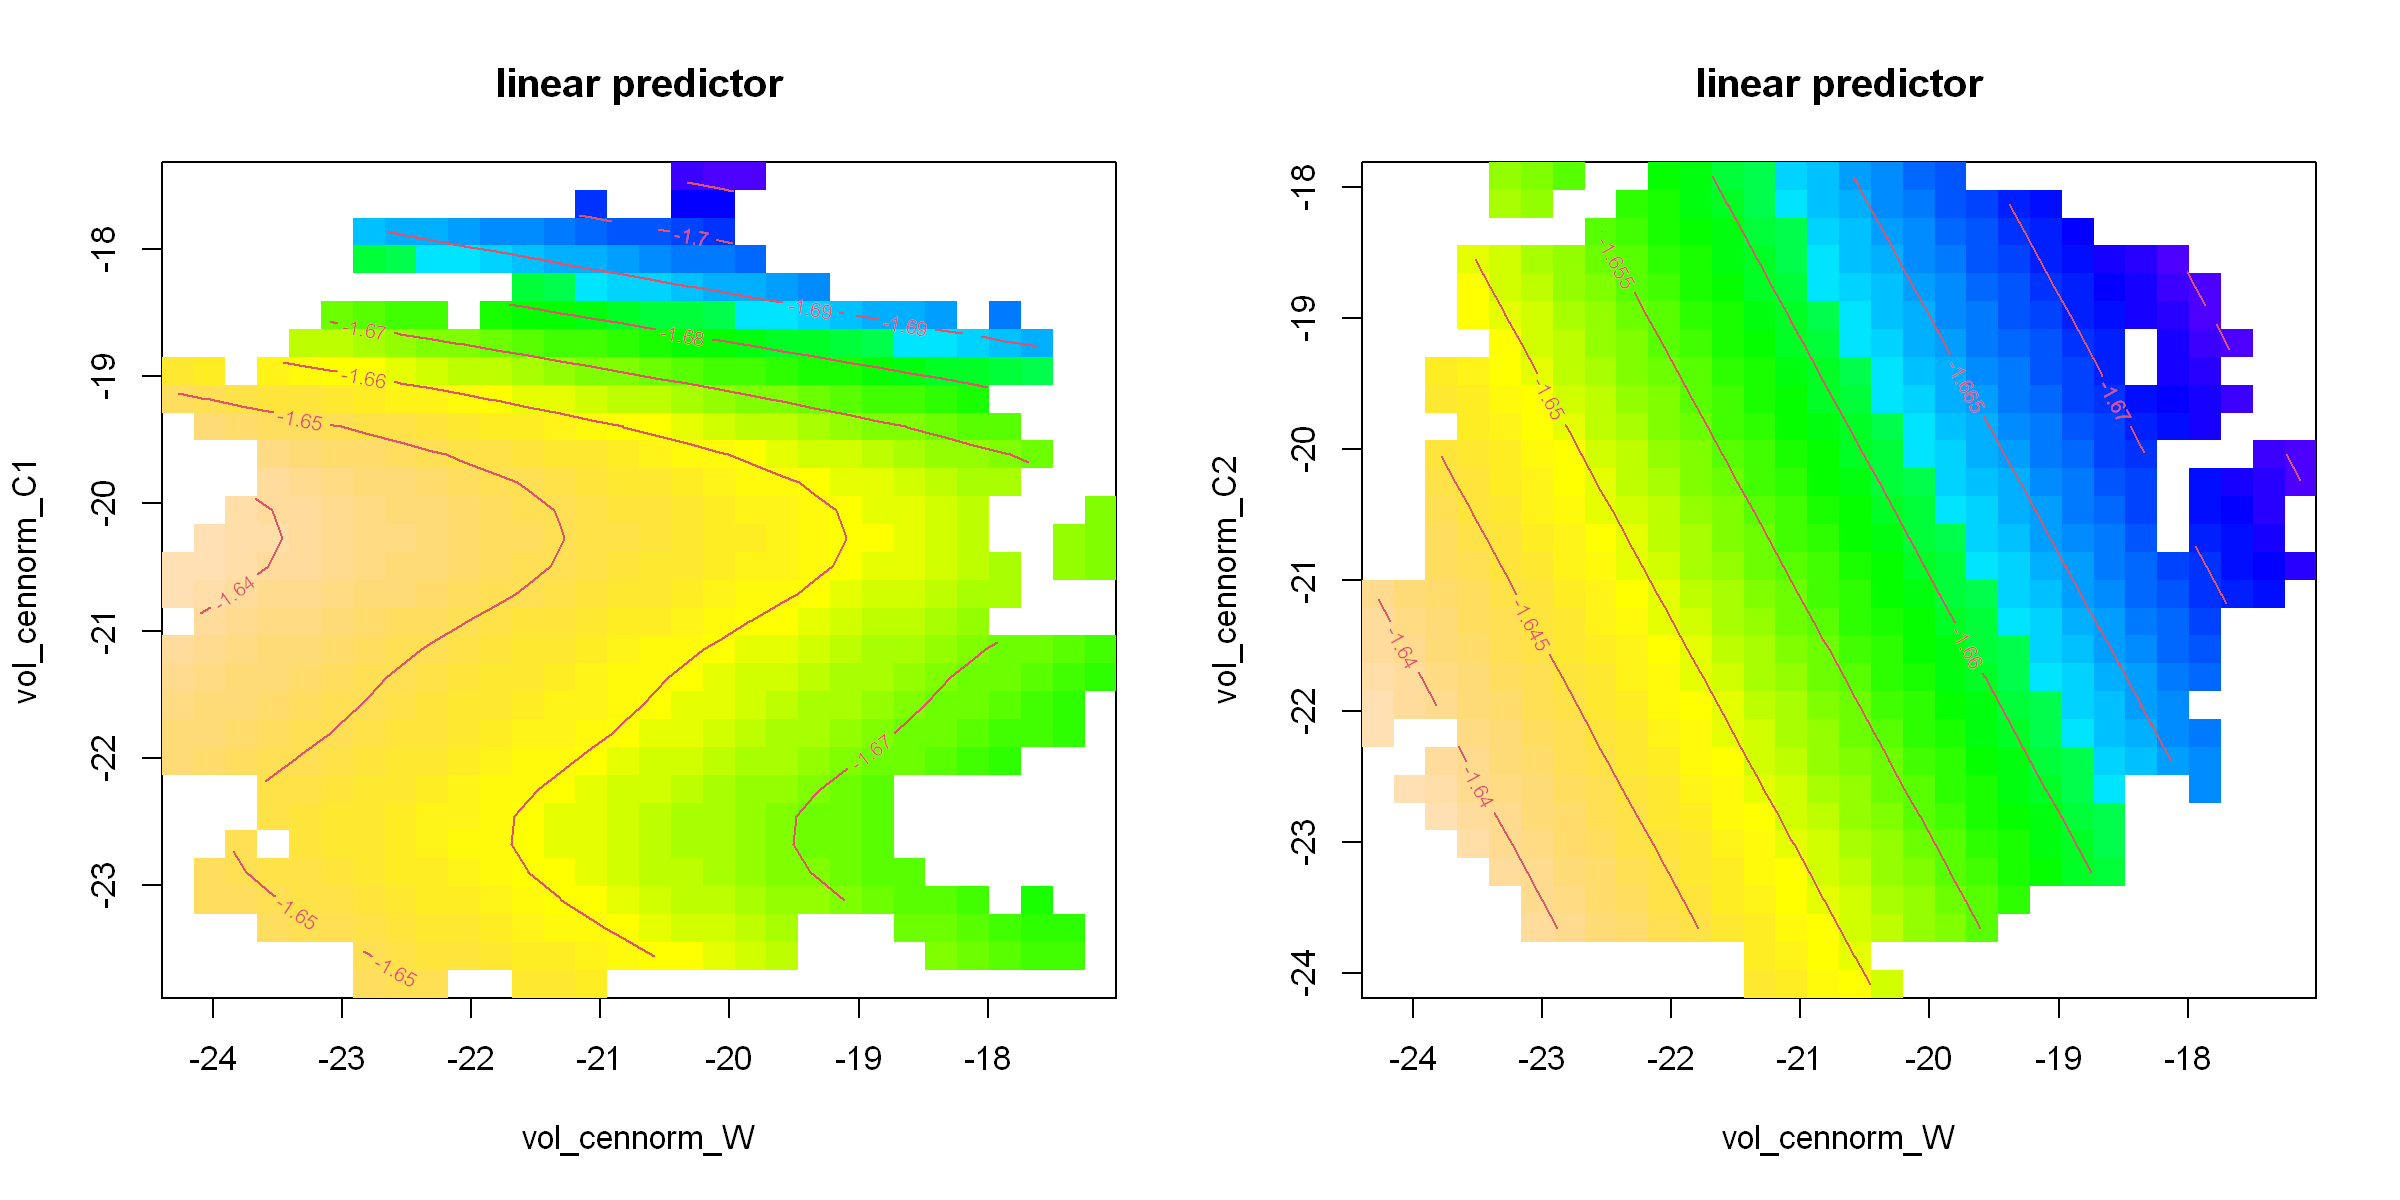

In [128]:
popt(12, 6)
par(mfrow=c(1, 2))
vis.gam(m.2, view=c("vol_cennorm_W", "vol_cennorm_C1"), plot.type="contour", color="topo", too.far=0.05)
vis.gam(m.2, view=c("vol_cennorm_W", "vol_cennorm_C2"), plot.type="contour", color="topo", too.far=0.05)